In [ ]:
#Name of File: FinalProjectProgramJupyter
#Date Created: Feb 16, 2023
#Created by: Bryan D'Amico, Matthew Smith, Sintia Stabel
#Purpose: Provide insight that would help a reader make a decision about what major streaming service would be best
#         for them to subscribe to.

# What's the Best Streaming Service for Me?

When Netflix first switched from mailing DVDs to having an on-demand streaming platform, that business model was seen as the solution to cable television. It was so popular, however, that it seems that every network is starting their own streaming service. These days, with so many streaming services, there is a temptation to subscribe to them all, making the solution to cable just as expensive. Each service tries to brand itself as being essential to have, but is this really true for everyone? If people were better informed about how the content on each service aligns with their personal interests, they would be able to save money by only choosing the ones that would bring them the most value.

This report is intended to provide a detailed analysis of several major streaming services to help a reader answer the question "What's the best streaming service for me?" for themselves.

## About the Data

The data was drawn from csv files of information for Amazon Prime, Disney+, HBOMax, Hulu, Netflix, and Paramount+, which were all found on Kaggle. These csv files were uploaded by Victor Soeiro in 2022 and contain data collected from the JustWatch database. The data reflects what was available on each service in the United States.

* Amazon Prime dataset: https://www.kaggle.com/datasets/victorsoeiro/amazon-prime-tv-shows-and-movies
* Disney+ dataset: https://www.kaggle.com/datasets/victorsoeiro/disney-tv-shows-and-movies
* HBOMax dataset: https://www.kaggle.com/datasets/victorsoeiro/hbo-max-tv-shows-and-movies
* Hulu dataset: https://www.kaggle.com/datasets/victorsoeiro/hulu-tv-shows-and-movies
* Netflix dataset: https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies 
* Paramount+ dataset: https://www.kaggle.com/datasets/victorsoeiro/paramount-tv-shows-and-movies
* JustWatch database: https://www.justwatch.com/us

Each dataset is set up in a similar fashion so that they can be concatenated into a larger data frame. They contain 15 columns of information on each movie or TV show available in the U.S. on the streaming service. The following table summarizes the data found in the data sets as they were downloaded for the analysis. All variable definitions were taken from the Kaggle dataset page.

| Variable Name | Description |
| :--- | :--- |
| id | The title ID on JustWatch. | 
| title | The name of the title. | 
| show_type | Indicates whether the title is a TV show or movie. |
| description | A brief text description of the program. | 
| release_year | The release year. | 
| age_certification | The age certification such as G, PG, TV14, R, etc. |
| runtime | The length of the episode for a show, or the length of the movie. | 
| genres | A list of the program's genres. |
| production_countries | A list of countries that produced the title. |
| seasons | The number of seasons if the program is a show. |
| imdb_id | The title ID on IMDB. |
| imdb_score |The score on IMDB. |
| imdb_votes | The number of votes for the score on IMDB. | 
| tmdb_popularity | Popularity on TMDB. (https://developers.themoviedb.org/3/getting-started/popularity) | 
| tmdb_score | Score on TMDB. | 

## Questions of Interest

In order to help the reader decide what streaming service would be best for them, this report sets out to answer the following questions.

1. What service has the genres of movies and shows that a potential subscriber might be interested in?
2. What service has the highest rated movies and shows?
3. Which services are improving or declining over time?
4. Is a program's score on IMDB related to the number of votes it receives?
5. Can age certifications be determined using the show or movie descriptions or genres?

## Importing the Data and Creating the Data Set

This section will show the process of how the data was imported and joined together to form a single large data frame containing the information on all the shows for all 6 streaming services.

In [516]:
#Loading all the packages that will be used in the analyses
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle
from collections import OrderedDict
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import nltk
from nltk.corpus import stopwords
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

%matplotlib inline
sns.set()

Each of the data sets were imported as separate data frames and named according to the streaming service.

In [2]:
#Importing all the separate data sets

hulu = pd.read_csv("Hulu_titles.csv")
netflix = pd.read_csv("Netflix_titles.csv")
hbo = pd.read_csv("HBO_titles.csv")
amazon = pd.read_csv("Amazon_titles.csv")
disney = pd.read_csv("Disney_titles.csv")
paramount = pd.read_csv("Paramount_titles.csv")

Before joining the data frames together, there needs to be a way to easily tell which shows and movies are on which streaming service. The individual data frames do not contain a column that shows that information. A "service" variable is created for each data frame which contains a string naming the service that the program is on. The columns are then reordered so service appears on the left side of the data frame.

In [3]:
#Adding the service column for each data frame and moving it to the left side
hulu["service"] = "Hulu"
hulu = hulu[["id", "service", "title", "type", "description", "release_year", "age_certification", "runtime", "genres", "production_countries", "seasons", "imdb_id", "imdb_score", "imdb_votes", "tmdb_popularity", "tmdb_score"]]

netflix["service"] = "Netflix"
netflix = netflix[["id", "service", "title", "type", "description", "release_year", "age_certification", "runtime", "genres", "production_countries", "seasons", "imdb_id", "imdb_score", "imdb_votes", "tmdb_popularity", "tmdb_score"]]

hbo["service"] = "HBOMax"
hbo = hbo[["id", "service", "title", "type", "description", "release_year", "age_certification", "runtime", "genres", "production_countries", "seasons", "imdb_id", "imdb_score", "imdb_votes", "tmdb_popularity", "tmdb_score"]]

amazon["service"] = "AmazonPrime"
amazon = amazon[["id", "service", "title", "type", "description", "release_year", "age_certification", "runtime", "genres", "production_countries", "seasons", "imdb_id", "imdb_score", "imdb_votes", "tmdb_popularity", "tmdb_score"]]

disney["service"] = "Disney+"
disney = disney[["id", "service", "title", "type", "description", "release_year", "age_certification", "runtime", "genres", "production_countries", "seasons", "imdb_id", "imdb_score", "imdb_votes", "tmdb_popularity", "tmdb_score"]]

paramount["service"] = "Paramount+"
paramount = paramount[["id", "service", "title", "type", "description", "release_year", "age_certification", "runtime", "genres", "production_countries", "seasons", "imdb_id", "imdb_score", "imdb_votes", "tmdb_popularity", "tmdb_score"]]

#Showing the first few rows of the Hulu data frame as an example
hulu.head(4)


,id,service,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20475,Hulu,Saturday Night Live,SHOW,A late-night live television sketch comedy and...,1975,TV-14,89,"['music', 'comedy']",['US'],47.0,tt0072562,8.0,47910.0,54.345,6.9
1,ts20413,Hulu,M*A*S*H,SHOW,The 4077th Mobile Army Surgical Hospital is st...,1972,TV-PG,26,"['war', 'comedy', 'drama']",['US'],11.0,tt0068098,8.4,55882.0,27.308,8.0
2,ts20005,Hulu,I Love Lucy,SHOW,Cuban Bandleader Ricky Ricardo would be happy ...,1951,TV-G,30,"['comedy', 'family']",['US'],9.0,tt0043208,8.5,25944.0,17.088,8.1
3,ts20669,Hulu,Taxi,SHOW,"Louie De Palma is a cantankerous, acerbic taxi...",1978,TV-PG,25,"['drama', 'comedy']",['US'],5.0,tt0077089,7.7,13379.0,14.346,7.3


Now that the individual data frames have been labeled by service they can be concatenated vertically into a single large data frame. The index for the data frame is reset so that it is sequential throughout the entire data frame.

In [4]:
#Concatenating all the dfs and resetting the index so its sequential all the way through
df_all = pd.concat([hulu, netflix, hbo, amazon, disney, paramount]).reset_index(drop = True)

To check that the new data frame has been created correctly, the number of rows in each individual data frame will be compared to the number of rows labeled as each service in the new data frame.

In [5]:
#Printing the length of each individual data frame along with how many entries have that service label in the combined
#data frame
print("The Amazon Prime data frame has", len(amazon), "entries and the new data frame has", len(df_all[df_all["service"] == "AmazonPrime"]), "entries labeled Amazon Prime.")
                                                                                                
print("The Disney+ data frame has", len(disney), "entries and the new data frame has", len(df_all[df_all["service"] == "Disney+"]), "entries labeled Disney+.")                                                                                                
                                                                                                
print("The HBOMax data frame has", len(hbo), "entries and the new data frame has", len(df_all[df_all["service"] == "HBOMax"]), "entries labeled HBOMax.")                                                                                                
                                                                                                
print("The Hulu data frame has", len(hulu), "entries and the new data frame has", len(df_all[df_all["service"] == "Hulu"]), "entries labeled Hulu.")                                                                                                
                                                                                                
print("The Netflix data frame has", len(netflix), "entries and the new data frame has", len(df_all[df_all["service"] == "Netflix"]), "entries labeled Netflix.")                                                                                                
                                                                                                
print("The Paramount+ data frame has", len(paramount), "entries and the new data frame has", len(df_all[df_all["service"] == "Paramount+"]), "entries labeled Paramount+.")                                                                                                
                                                                                                                                                                                                                                                                                            

The Amazon Prime data frame has 9871 entries and the new data frame has 9871 entries labeled Amazon Prime.
The Disney+ data frame has 1535 entries and the new data frame has 1535 entries labeled Disney+.
The HBOMax data frame has 3294 entries and the new data frame has 3294 entries labeled HBOMax.
The Hulu data frame has 2398 entries and the new data frame has 2398 entries labeled Hulu.
The Netflix data frame has 5850 entries and the new data frame has 5850 entries labeled Netflix.
The Paramount+ data frame has 2825 entries and the new data frame has 2825 entries labeled Paramount+.


All the data for each service has been successfully combined into a single pandas DataFrame. To preserve this data set it is saved as an external csv file.

In [6]:
#Saving the data frame containing all the streaming services to a csv file
df_all.to_csv(r"All_Services.csv")

## Data Cleaning

The combined data frame containing all of the streaming service data sets has a total of 25,773 entries and 16 columns.

In [18]:
#Showing the number of rows and columns
df_all.shape

(25773, 16)

In [25]:
#Showing all the column names
df_all.columns

Index(['id', 'service', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

### Viewing and Cleaning Missing Values

The number of missing values for each column are counted below. Each column with missing values will be investigated to understand why those values might be missing.

In [10]:
#Calculating the number of missing values for each column
df_all.isna().sum()

id                          0
service                     0
title                       1
type                        0
description               181
release_year                0
age_certification       12847
runtime                     0
genres                      0
production_countries        0
seasons                 19183
imdb_id                  2092
imdb_score               2680
imdb_votes               2721
tmdb_popularity           789
tmdb_score               3418
dtype: int64

The entry for the one missing title is displayed below. This entry is missing almost all of its information, so it will just be removed from the dataframe.

In [20]:
#Showing the single entry with a missing title
df_all[df_all["title"].isna()]

,id,service,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
4102,tm1063792,Netflix,NaN,MOVIE,NaN,2015,NaN,11,[],[],NaN,tt4661188,NaN,NaN,NaN,NaN


In [21]:
#Dropping that missing title
df_all = df_all.drop(index = 4102)

In [22]:
#Showing that title no longer has any missing values
df_all.isna().sum()

id                          0
service                     0
title                       0
type                        0
description               180
release_year                0
age_certification       12846
runtime                     0
genres                      0
production_countries        0
seasons                 19182
imdb_id                  2092
imdb_score               2679
imdb_votes               2720
tmdb_popularity           788
tmdb_score               3417
dtype: int64

Briefly looking at the titles with missing descriptions reveals they are a mix of shows and movies and are on different streaming services. Sometimes there are programs that do not have a description when viewing the info on a streaming platform. These entries will be left alone.

In [26]:
#Showing entries that have a missing description
df_all[df_all["description"].isna()]

,id,service,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
761,ts147982,Hulu,NASA X,SHOW,NaN,2012,TV-G,24,['family'],['US'],3.0,tt4319084,NaN,NaN,NaN,NaN
977,ts150540,Hulu,Triumph,SHOW,NaN,2014,TV-MA,30,['drama'],['US'],1.0,tt4059154,NaN,NaN,NaN,NaN
987,ts296374,Hulu,Catfish Colombia,SHOW,NaN,2014,NaN,48,['reality'],[],2.0,NaN,NaN,NaN,1.400,NaN
1212,ts100656,Hulu,No Filter,SHOW,NaN,2016,NaN,43,[],['US'],1.0,tt5910978,NaN,NaN,NaN,NaN
1244,ts115839,Hulu,The Insider: Reggie Yates,SHOW,NaN,2016,NaN,52,['documentation'],[],2.0,tt7748350,7.1,42.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25288,ts80881,Paramount+,Survival in the Skies,SHOW,NaN,2017,TV-PG,46,['documentation'],['US'],1.0,tt6588988,NaN,NaN,0.600,NaN
25396,ts326817,Paramount+,China's Dragon Emperor,SHOW,NaN,2018,TV-PG,44,['drama'],['KR'],1.0,NaN,NaN,NaN,0.601,NaN
25573,tm906222,Paramount+,America's Wild Borders,MOVIE,NaN,2020,NaN,50,['documentation'],['US'],NaN,tt11961790,7.3,10.0,NaN,NaN
25622,tm477066,Paramount+,A President Show Documentary: The Fall of Dona...,MOVIE,NaN,2019,NaN,22,['comedy'],[],NaN,tt9140418,3.4,174.0,NaN,NaN


There are 12,846 titles that do not have an age certification rating. Since these titles were not rated, these missing values can be replaced with the string "Not Rated".

In [27]:
#Replacing the missing values in the age certification with Not Rated
df_all["age_certification"].fillna("Not Rated", inplace = True)

In [28]:
#Showing that there are now no missing values for age certification
df_all.isna().sum()

id                          0
service                     0
title                       0
type                        0
description               180
release_year                0
age_certification           0
runtime                     0
genres                      0
production_countries        0
seasons                 19182
imdb_id                  2092
imdb_score               2679
imdb_votes               2720
tmdb_popularity           788
tmdb_score               3417
dtype: int64

There are 19,182 titles with no seasons. The dataframe is filtered to show only those rows where the seasons value is missing, and the unique values of the type column are displayed. The only titles with missing season values are movies. Since movies do not have seasons these values will be left as missing. It does not make sense to say the movie has 0 seasons since that is not an attribute of movies.

In [29]:
#Find the unique values that exist when the season value is missing reveals that only movies have missing season
#values which makes sense
df_all[df_all["seasons"].isna()]["type"].unique()

array(['MOVIE'], dtype=object)

The missing values related to the IMDB and TMDB databases will also be left as missing. If there is no data for those titles on those sites then it does not make sense to replace those values with 0 or any other number because that data does not exist.

### Data Type Conversions

Before working the data frame, it is important to ensure that the columns have the correct data types to support the analyses. All of the numeric columns are either floats or integers, however, the columns containing strings are of the object type. The columns that are purely text will be manually converted to be the string type.

In [135]:
#Showing the data type of each column in the data frame
df_all.dtypes

id                       object
service                  object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

In [136]:
#Converting the columns to have the string type
df_all["service"] = pd.Series(df_all["service"], dtype = "string")
df_all["title"] = pd.Series(df_all["title"], dtype = "string")
df_all["type"] = pd.Series(df_all["type"], dtype = "string")
df_all["age_certification"] = pd.Series(df_all["age_certification"], dtype = "string")

The changes were successful and the data types of those columns are now string.

In [137]:
#Showing that those column types were changed correctly
df_all.dtypes

id                       object
service                  string
title                    string
type                     string
description              object
release_year              int64
age_certification        string
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

### Genres

The genres column contains lists of strings describing the genres for each title. To analyze the different genres present on each service, this variable will be split into several genre variables. This will allow the titles to be grouped into several genres if that applies. A new data frame will be created for any genre analysis since it will have many more columns than the original data frame.

This is done by first applying the pd.Series() function to the "genres" column. Next the function "split_genres" strips the square brackets and spaces from the "genres" column of the input row, and splits the resulting string into a list of genres. It then iterates over the list of genres, adding a new column to the input row for each genre.

In [269]:
# Splitting the "genres" column and create separate columns for each genre
df_genre = df_all['genres'].apply(pd.Series).add_prefix('genre_')
df_all_genres = pd.concat([df_all, df_genre], axis=1)


In [270]:
# Defining the function to split genres
def split_genres(row):
    row['genres'] = [genre.strip() for genre in row['genres'].strip("[]").split(',')]
    for i, genre in enumerate(row['genres']):
        row[f'genre_{i}'] = genre
    return row

# Apply function to each row
df_all_genres = df_all.apply(split_genres, axis=1)

In [274]:
#Showing the data frame with the several genre variables. The options for the Jupyter notebook had to be changed so
#all the columns are shown
pd.set_option('display.max_columns', None)
df_all_genres

,age_certification,description,genre_0,genre_1,genre_10,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genres,id,imdb_id,imdb_score,imdb_votes,production_countries,release_year,runtime,seasons,service,title,tmdb_popularity,tmdb_score,type
0,TV-14,A late-night live television sketch comedy and...,'music','comedy',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['music', 'comedy']",ts20475,tt0072562,8.0,47910.0,['US'],1975,89,47.0,Hulu,Saturday Night Live,54.345,6.9,SHOW
1,TV-PG,The 4077th Mobile Army Surgical Hospital is st...,'war','comedy',NaN,'drama',NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['war', 'comedy', 'drama']",ts20413,tt0068098,8.4,55882.0,['US'],1972,26,11.0,Hulu,M*A*S*H,27.308,8.0,SHOW
2,TV-G,Cuban Bandleader Ricky Ricardo would be happy ...,'comedy','family',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['comedy', 'family']",ts20005,tt0043208,8.5,25944.0,['US'],1951,30,9.0,Hulu,I Love Lucy,17.088,8.1,SHOW
3,TV-PG,"Louie De Palma is a cantankerous, acerbic taxi...",'drama','comedy',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['drama', 'comedy']",ts20669,tt0077089,7.7,13379.0,['US'],1978,25,5.0,Hulu,Taxi,14.346,7.3,SHOW
4,TV-PG,30-year-old single Mary Richards moves to Minn...,'comedy',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['comedy'],ts21049,tt0065314,8.2,8692.0,['US'],1970,28,7.0,Hulu,The Mary Tyler Moore Show,9.290,7.5,SHOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25768,TV-14,The talk show legend travels across the countr...,'reality',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['reality'],ts305329,tt15176234,5.4,35.0,['US'],2021,43,1.0,Paramount+,House Calls with Dr. Phil,0.600,NaN,SHOW
25769,TV-MA,NaN,'documentation',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['documentation'],ts291097,tt14315936,3.5,18.0,[],2021,40,1.0,Paramount+,Disrupt & Dismantle with Soledad O'Brien,NaN,NaN,SHOW
25770,Not Rated,Follows former top officials and elite operati...,'documentation',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['documentation'],tm1100359,tt15392066,4.6,64.0,[],2021,89,NaN,Paramount+,Race Against Time: The CIA and 9/11,2.403,NaN,MOVIE
25771,Not Rated,"As the world battles COVID-19, a team of exper...",,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],tm1097570,NaN,NaN,NaN,[],2021,60,NaN,Paramount+,Virus Hunting: Cave to COVID,0.600,NaN,MOVIE


## Exploratory Data Analysis

The distributions of several important variables will be visualized and described to provide a better sense of the data that will be used to answer the questions of interest.

### Distribution of Titles Across Streaming Services

The dataframe is separated by which streaming service the titles belong to and then the number of titles on each streaming service is counted.

In [40]:
#Grouping by service and counting the number of titles
title_counts = df_all.groupby("service")["title"].count()

#Turning the count series into a data frame
title_counts_df = title_counts.to_frame()
#Resetting the index so service is a column to use in the visualization
title_counts_df = title_counts_df.reset_index()
#Displaying the data frame
title_counts_df

,service,title
0,AmazonPrime,9871
1,Disney+,1535
2,HBOMax,3294
3,Hulu,2398
4,Netflix,5849
5,Paramount+,2825


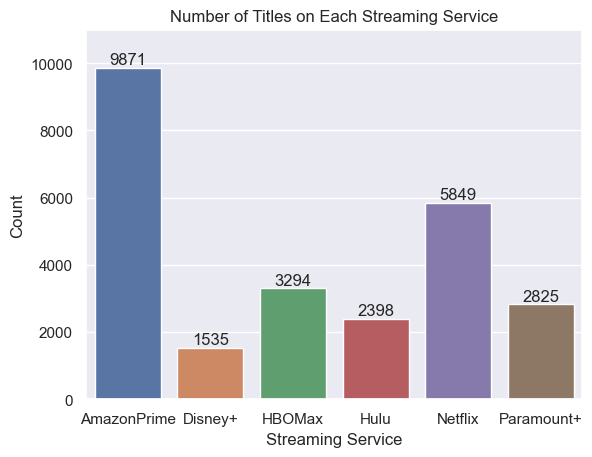

In [45]:
#Creating a barplot of the number of titles on each streaming service
ax = sns.barplot(x = "service", y = "title", data = title_counts_df);

#Setting the title and axes labels
ax.set(title = "Number of Titles on Each Streaming Service", xlabel = "Streaming Service", ylabel = "Count");

#Extending the plot in the y direction to give more room for the bar labels
ax.set_ylim((0, 11000));

#Labeling each bar with the actual values
for i in ax.containers:
    ax.bar_label(i,)

Amazon Prime has the most titles by far, having approximately 4,000 more than Netflix, the next largest service by number of titles. Disney+ has the smallest selection with just over 1,500 titles.

### Distribution of TV Shows and Movies

The data frame is separated by the program type, whether it is a show or movie, and then the number of titles for each is counted.

In [50]:
#Grouping by movie or show and counting the number of titles in each
types = df_all.groupby("type")["title"].count()
#Converting the series to a data frame
type_df = types.to_frame()
#Resetting the index so the type can be used in the visualization
type_df = type_df.reset_index()
#Displaying the data frame
type_df

,type,title
0,MOVIE,19182
1,SHOW,6590


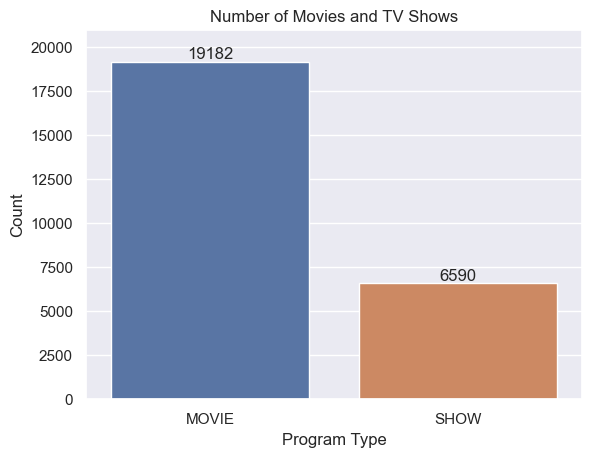

In [571]:
#Creating a bar plot showing the counts of titles by program type
ax = sns.barplot(x = "type", y = "title", data = type_df);
#Setting the title and the axes labels
ax.set(title = "Number of Movies and TV Shows", xlabel = "Program Type", ylabel = "Count");
#Extending the y-axis to make room for the bar labels
ax.set_ylim((0, 21000));
#Labeling each bar with the actual number in each category
for i in ax.containers:
    ax.bar_label(i,)

Among all the streaming services there are about three times as many movies as shows. Next, the data frame will be further broken down by each streaming service to see how the number of movies and shows compare in each.

In [58]:
#Creating a data frame of the data grouped by service and then type and counting the number of titles in each group
types_by_service = pd.DataFrame(df_all.groupby(["service", "type"])["title"].count())
#Resetting the index to use the service and type columns in the visualization
types_by_service = types_by_service.reset_index()
#Display the dataframe
types_by_service

,service,type,title
0,AmazonPrime,MOVIE,8514
1,AmazonPrime,SHOW,1357
2,Disney+,MOVIE,1120
3,Disney+,SHOW,415
4,HBOMax,MOVIE,2538
5,HBOMax,SHOW,756
6,Hulu,MOVIE,1068
7,Hulu,SHOW,1330
8,Netflix,MOVIE,3743
9,Netflix,SHOW,2106


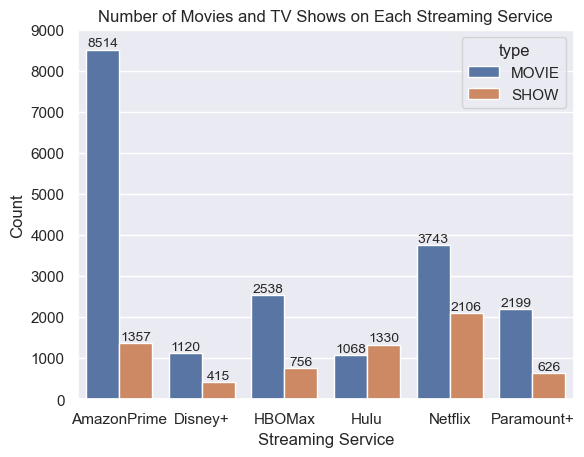

In [62]:
#Creating a side-by-side bar plot of the number of movies and shows on each streaming service
ax = sns.barplot(x = "service", y = "title", hue = "type", data = types_by_service);

#Setting the title and axes labels
ax.set(title = "Number of Movies and TV Shows on Each Streaming Service", xlabel = "Streaming Service",
      ylabel = "Count");

#Extending the y-axis to make room for the bar labels
ax.set_ylim((0, 9000));

#Labeling each bar with the actual number in each group
for i in ax.containers:
    ax.bar_label(i, fontsize = 10)

All but one of the streaming services have more movies than shows. Hulu has just under 300 more shows than it does movies. This means Amazon Prime, Disney+, HBOMax, Netflix, and Paramount+ have a similar makeup where they are more focused on providing movie content to viewers. Hulu may be intentionally providing more shows than movies to differentiate itself from the rest of the field.

### Distribution of Release Years

The number of programs will be placed into 5 year bins based on their release dates. This will show how old the streaming content across all the services is.

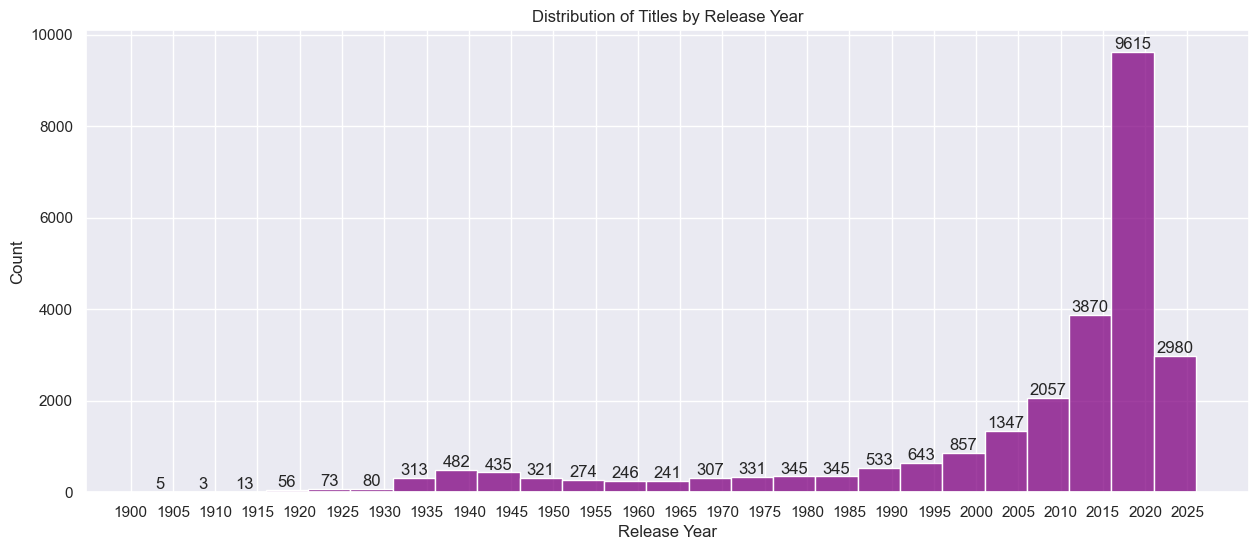

In [90]:
#Widening the plot space
plt.figure(figsize=(15,6));

#Creating a histogram of the distribution of the titles by release year over 5 year periods
ax = sns.histplot(x = "release_year", binwidth = 5, color = "purple", data = df_all);

#Setting the title and axes labels
ax.set(title = "Distribution of Titles by Release Year", xlabel = "Release Year");

#Setting the x-axis ticks to go in 5 year increments to match the bins
ax.set_xticks(range(1900, 2030, 5));

#Labeling each bar with the actual count for each bin
for i in ax.containers:
    ax.bar_label(i,)

While there is a good amount of old content available to be streamed, the great majority of the content is from the last decade or so. There are significantly more titles released after 2010 than from all the years before then.

Next the distributions will be separated by their type to show the release years of the TV shows and movies separately.

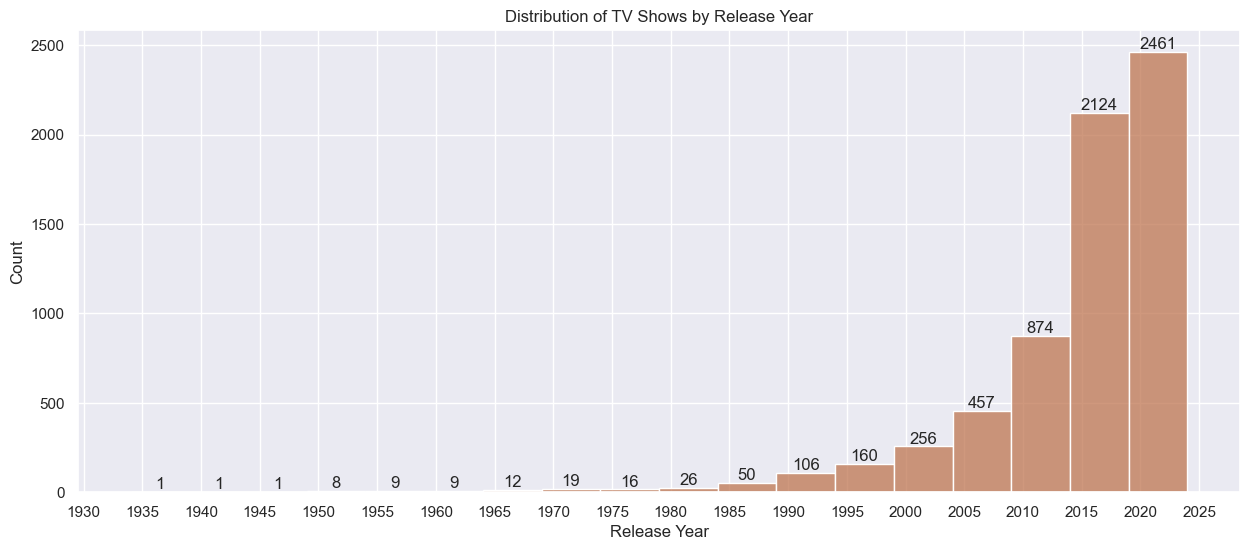

In [93]:
#Creating a data frame of just the TV shows
df_all_shows = df_all[df_all["type"] == "SHOW"]

#Widening the plot space
plt.figure(figsize=(15,6));

#Creating a histogram of distribution of shows by release year using 5 year bins 
ax = sns.histplot(x = "release_year", binwidth = 5, color = "#BF7651", data = df_all_shows);

#Setting the title and axes labels
ax.set(title = "Distribution of TV Shows by Release Year", xlabel = "Release Year");

#Setting the x-axis ticks to match the bin width
ax.set_xticks(range(1930, 2030, 5));

#Labeling the bars with the actual counts of each bin
for i in ax.containers:
    ax.bar_label(i,)

The distribution of the shows by release year is similar to the overall distribution by release year. This data is even further skewed towards recent releases however, with very few shows predating the 1990s.

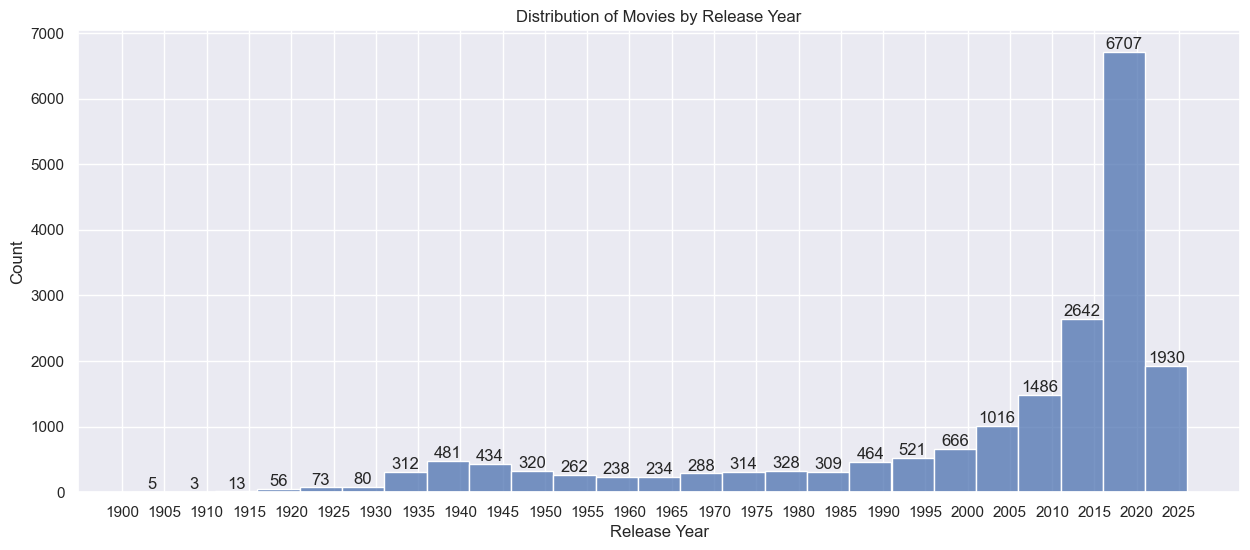

In [224]:
#Creating a data frame of just the movies
df_all_movies = df_all[df_all["type"] == "MOVIE"]

#Widening the plot space
plt.figure(figsize=(15,6));

#Creating a histogram of the distribution of movies by release year using 5 year bins
ax = sns.histplot(x = "release_year", binwidth = 5, data = df_all_movies);

#Setting the title and axes labels
ax.set(title = "Distribution of Movies by Release Year", xlabel = "Release Year");

#Setting the x-axis ticks to 5 year increments to match the bin width
ax.set_xticks(range(1900, 2030, 5));

#Labeling the bars with the actual counts for each bin
for i in ax.containers:
    ax.bar_label(i,)

While the distribution of release years for movies follows the same pattern as the overall distribution, it is clear that there are many more old movies still available to be streamed than there are TV shows. This is probably due to the fact that movies as an entertainment medium began well before TV shows.

### Distribution of Age Certifications

Since there are different age certifications for movies and TV shows, the dataframes where the titles are separated by type will be used. 

The movies are grouped by their age certifications and the numbers of titles with each certification rating are counted.

In [148]:
#Grouping by age certification and counting the number of titles
movie_age_certs = df_all_movies.groupby("age_certification")["age_certification"].count()
#Viewing the data in dictionary format
movie_age_certs_dict = movie_age_certs.to_dict()
movie_age_certs_dict

{'G': 1013,
 'NC-17': 41,
 'Not Rated': 11449,
 'PG': 1709,
 'PG-13': 1938,
 'R': 3032}

In [174]:
#Creating an ordered dictionary containing the age certification information for the next visualization
movie_age_certs_ordered = OrderedDict({"G": 1013, "PG": 1709, "PG-13": 1938, 
                                       "R": 3032, "NC-17": 41, "Not Rated": 11449})

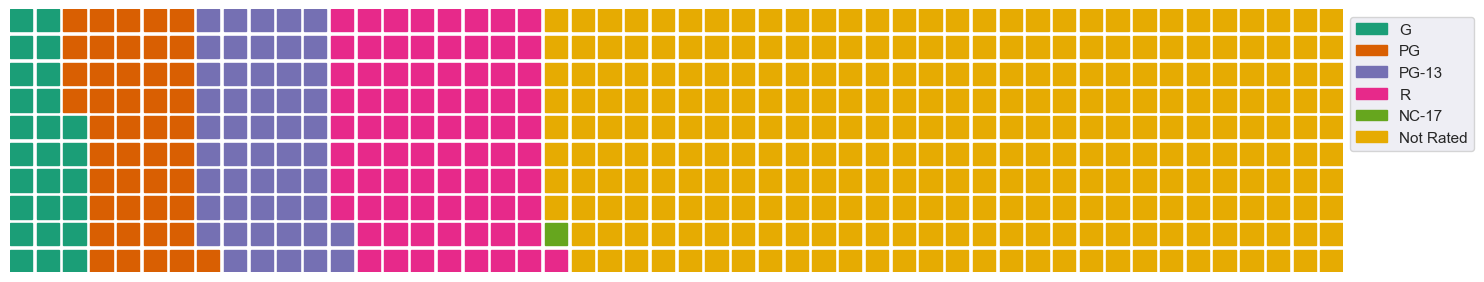

In [191]:
#Creating a waffle chart showing the distribution of titles according to age certification
#The plot was scaled so that the smallest category (NC-17) is represented with a single square
plt.figure(figsize=(15, 6),
           FigureClass = Waffle,
           rows = 10,
           columns = 50,
           values = movie_age_certs_ordered,
           cmap_name = "Dark2",
           legend = {'loc': 'upper left', 'bbox_to_anchor': (1, 1)});
plt.show()

The majority great majority of movies available on these streaming services do not have a rating. There are very few NC-17 rated movies. Out of the movies that are rated, the majority are R and there are fairly equal numbers of PG and PG-13 movies.

The distribution of age certifications for TV shows will also be shown.

In [192]:
#Grouping the TV show data by age certification and then counting the number of titles
show_age_certs = df_all_shows.groupby("age_certification")["age_certification"].count()
#Viewing the data as a dictionary
show_age_certs_dict = show_age_certs.to_dict()
show_age_certs_dict

{'Not Rated': 1397,
 'TV-14': 1577,
 'TV-G': 371,
 'TV-MA': 1764,
 'TV-PG': 797,
 'TV-Y': 309,
 'TV-Y7': 375}

In [194]:
#Creating an ordered dictionary out of the age certification data for the visualization
show_age_certs_ordered = OrderedDict({"TV-G": 371, "TV-PG": 797, "TV-Y": 309, 
                                      "TV-Y7": 375, "TV-14": 1577, "TV-MA": 1764, "Not Rated": 1397})

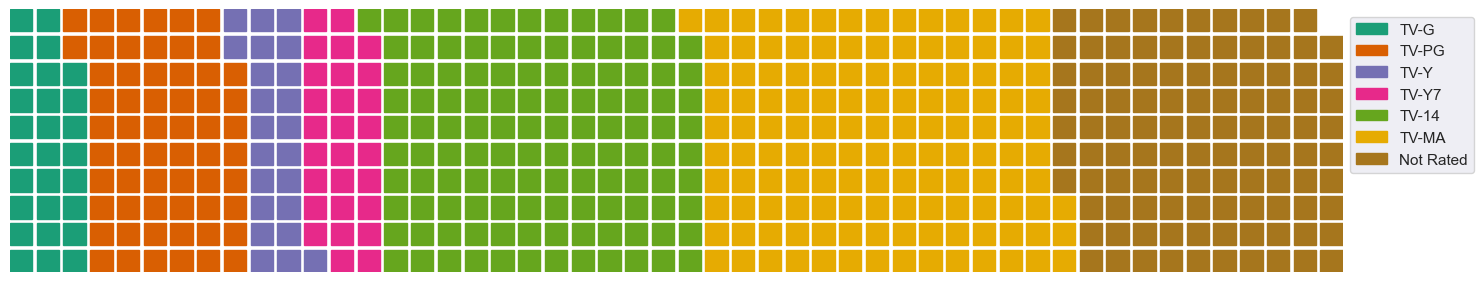

In [195]:
#Creating a waffle chart showing the distribution of titles according to age certification
#The plot was given the same scale as the movie age certification waffle chart
plt.figure(figsize=(15, 6),
           FigureClass = Waffle,
           rows = 10,
           columns = 50,
           values = show_age_certs_ordered,
           cmap_name = "Dark2",
           legend = {'loc': 'upper left', 'bbox_to_anchor': (1, 1)});
plt.show()

The majority of TV shows are for older audiences, rated either TV-14 or TV-MA. There are still a substantial number of TV shows that do not have ratings, but proportionally much less than for the movies. The number of TV shows rated as suitable for children (TV-G, TV-PG, TV-Y, and TV-Y7) is about the same as the number of shows rated TV-MA.

Since the age certification makeup could vary greatly by streaming service, the movie and TV show data will be grouped by service and age certification before finding the counts of each category. This data will then be visualized using interactive treemaps.

In [252]:
#Grouping the movies dataframe by service and age certification and then getting the counts for each age certification
movie_age_certs_by_service = df_all_movies.groupby(["service", "age_certification"])["age_certification"].count()
#Creating the new dataframe
movie_age_certs_by_service = movie_age_certs_by_service.to_frame()
#Renaming the count columns to avoid two columns having the same name
movie_age_certs_by_service = movie_age_ce#rts_by_service.rename(columns = {"age_certification": "Count"})
#Resetting the index to use all the columns in the visualization
movie_age_certs_by_service = movie_age_certs_by_service.reset_index()
#Displaying the dataframe
movie_age_certs_by_service

,service,age_certification,Count
0,AmazonPrime,G,269
1,AmazonPrime,NC-17,13
2,AmazonPrime,Not Rated,5813
3,AmazonPrime,PG,582
4,AmazonPrime,PG-13,588
5,AmazonPrime,R,1249
6,Disney+,G,409
7,Disney+,Not Rated,258
8,Disney+,PG,354
9,Disney+,PG-13,99


In [253]:
#Creating a treemap with two levels, the service and then the number of titles with each age certification
fig = px.treemap(movie_age_certs_by_service, path = ["service", "age_certification"], values = "Count",
                title = "Number of Movies by Age Certification for Each Streaming Service")
#Making the background box light gray
fig.update_traces(root_color = "lightgrey")
fig.show()

The majority of movies do not have a rating for each of the streaming services, except for Disney+. Keeping with their family friendly image, the majority of movies are rated either G or PG, with no movies rated R.

In [232]:
#Grouping the shows dataframe by service and age certification and then getting the counts for each age certification
show_age_certs_by_service = df_all_shows.groupby(["service", "age_certification"])["age_certification"].count()
#Creating the new dataframe
show_age_certs_by_service = show_age_certs_by_service.to_frame()
#Changing the column name to avoid two columns having the same name
show_age_certs_by_service = show_age_certs_by_service.rename(columns = {"age_certification": "Count"})
#Resetting the index to use the columns in the visualization
show_age_certs_by_service = show_age_certs_by_service.reset_index()
#Displaying the dataframe
show_age_certs_by_service

,service,age_certification,Count
0,AmazonPrime,Not Rated,674
1,AmazonPrime,TV-14,188
2,AmazonPrime,TV-G,57
3,AmazonPrime,TV-MA,217
4,AmazonPrime,TV-PG,91
5,AmazonPrime,TV-Y,78
6,AmazonPrime,TV-Y7,52
7,Disney+,Not Rated,67
8,Disney+,TV-14,49
9,Disney+,TV-G,92


In [245]:
#Creating a treemap with two levels, the first is the streaming service and the second is the age certification ratings
fig = px.treemap(show_age_certs_by_service, path = ["service", "age_certification"], values = "Count",
                title = "Number of TV Shows by Age Certification for Each Streaming Service")
#Making the background light gray
fig.update_traces(root_color = "lightgrey")
fig.show()

Netflix and HBOMax have the greatest proportion of their TV shows rated for mature audiences. Hulu and Paramount+ have most of their shows rated TV-14, while Amazon Prime contains mostly shows that are not rated. Similar to the age certifications for the movies, Disney+ has mostly family friendly shows with a small segment of them rated TV-14 and no shows rated TV-MA.

### Distribution of Runtimes

Since not everyone has the same amount of time to watch TV or movies during the day, a reader might be interested in how long the TV shows and movies are. 

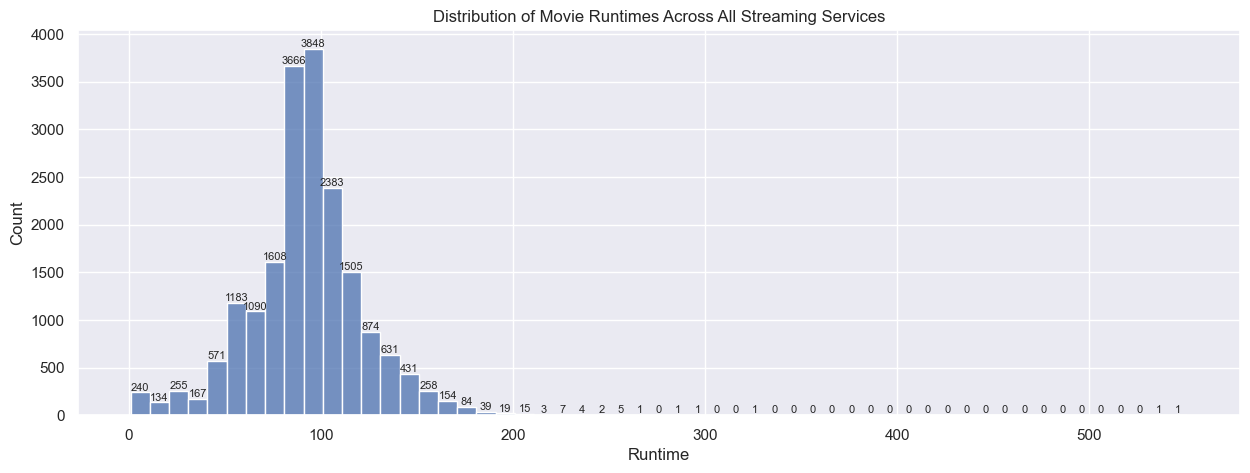

In [256]:
#Making the plot space wider
plt.figure(figsize = (15, 5))
#Creating the histogram of runtimes grouped using 10 minute bins
ax = sns.histplot(x = "runtime", binwidth = 10, data = df_all_movies);

#Setting the title and x-axis label
ax.set(title = "Distribution of Movie Runtimes Across All Streaming Services", xlabel = "Runtime");

#Labeling the bars with the actual counts of number of movies
for i in ax.containers:
    ax.bar_label(i, fontsize = 8)

The majority of movies are about 80 to 110 minutes in length. There are a couple hundred movies that are very short and a few movies that are very long, with two movies longer than 500 minutes.

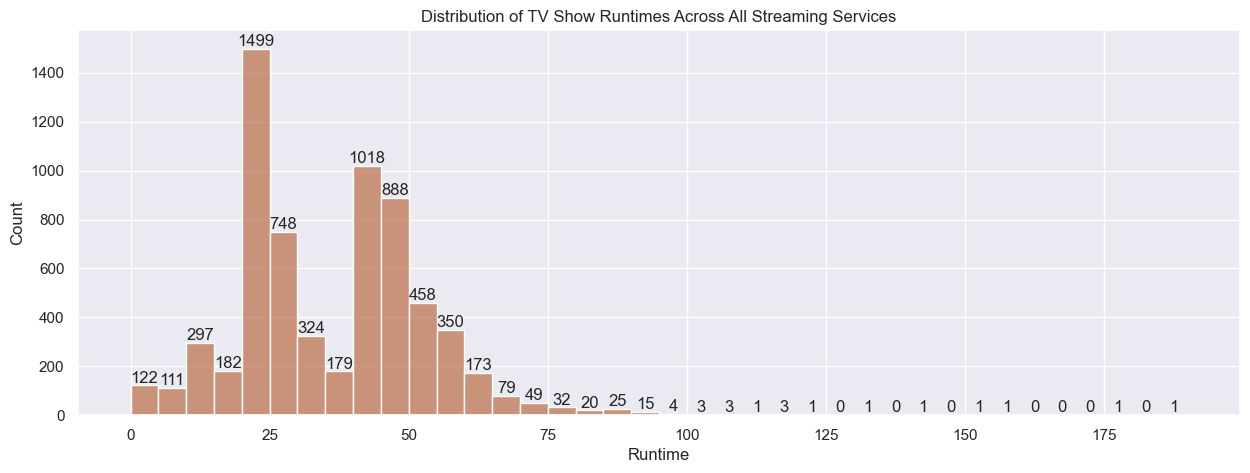

In [257]:
#Making the plot space wider
plt.figure(figsize = (15, 5))

#Creating the histogram of runtimes grouped using 5 minute bins
ax = sns.histplot(x = "runtime", binwidth = 5, color = "#BF7651", data = df_all_shows);

#Setting the title and x-axis label
ax.set(title = "Distribution of TV Show Runtimes Across All Streaming Services", xlabel = "Runtime");

#Labeling the bars with the actual counts of number of movies
for i in ax.containers:
    ax.bar_label(i,)

The distribution of show times has some bimodal characteristics, which makes sense since most U.S. shows are made to fit into either 30 minute or 60 minute blocks including ads. The majority of shows are either around 25 minutes or 45 to 55 minutes in length.

### Distribution of Seasons for TV Shows

The boxplot reveals that more than 50% of the TV shows do not last for more than two seasons. It also shows the outliers which would be a collection of very successful shows that have run for an extremely long time.

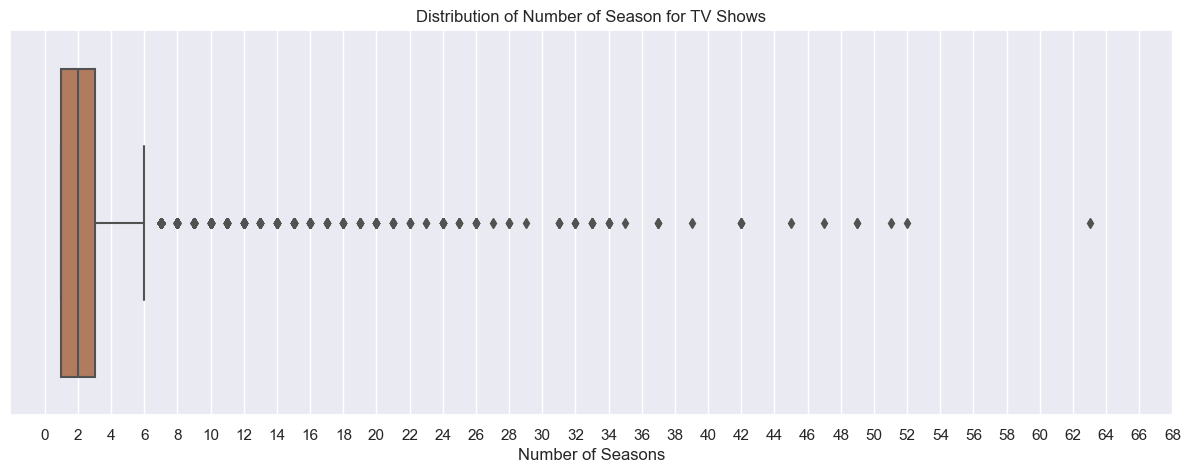

In [578]:
#Making the plot space wider
plt.figure(figsize = (15, 5))
#Creating a box plot to show the distribution of the number of seasons for the TV show data
ax = sns.boxplot(x = "seasons", color = "#BF7651", data = df_all_shows);
#Setting the x-axis ticks to increase clarity
ax.set_xticks(range(0, 70, 2));
ax.set(title = "Distribution of Number of Season for TV Shows", xlabel = "Number of Seasons");

### Distributions of IMDB and TMDB Scores

To understand if there are any innate differences between the ratings on the two movie databases, the distributions will be visualized.

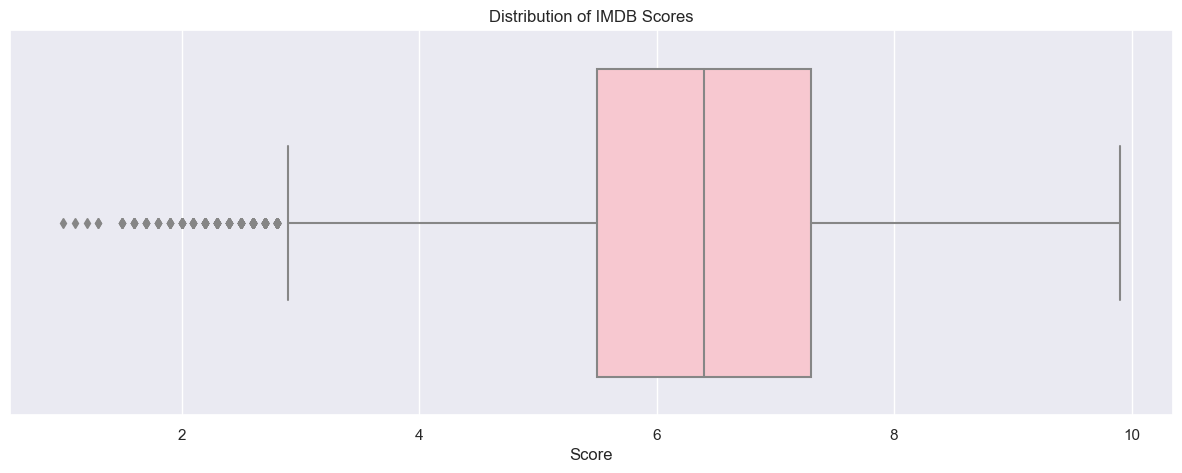

In [265]:
#Making the plot space wider
plt.figure(figsize = (15, 5))
#Creating the boxplot showing the distribution of IMDB scores
ax = sns.boxplot(x = "imdb_score", color = "pink", data = df_all);
#Setting the title and x-axis label
ax.set(title = "Distribution of IMDB Scores", xlabel = "Score");

The distribution is centered around the 6 to 7 score range, with the middle 50% of the data between scores of 5 and 8. This seems likely as the majority of titles would probably settle around an "average" rating, which in the U.S. is likely a 6 or 7.

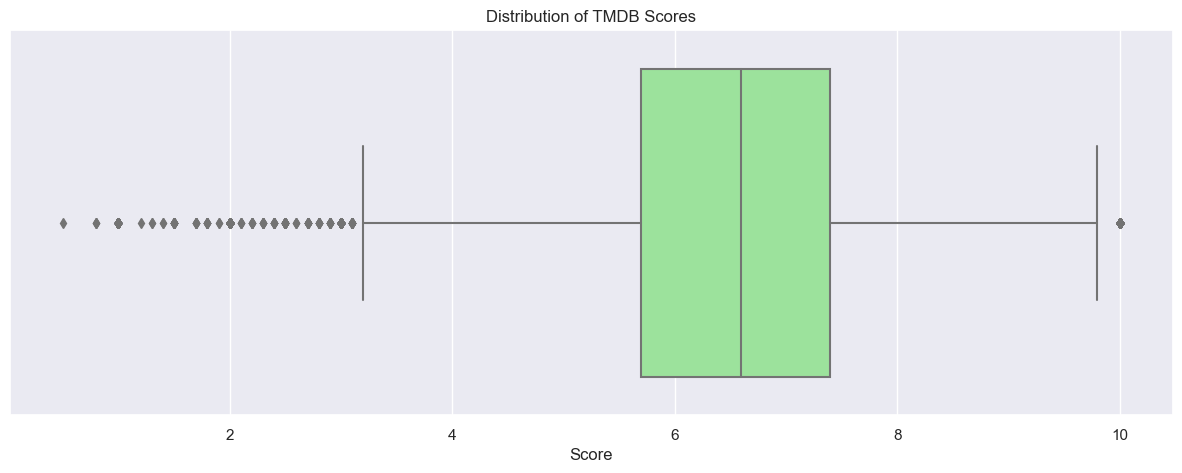

In [267]:
#Making the plot space wider
plt.figure(figsize = (15, 5))

#Creating the boxplot showing the distribution of TMDB scores
ax = sns.boxplot(x = "tmdb_score", color = "lightgreen", data = df_all);
#Setting the title and x-axis label
ax.set(title = "Distribution of TMDB Scores", xlabel = "Score");

The distribution of the TMDB scores is extremely similar to the distribution of IMDB scores, with the middle 50% of the data again lying between scores of 5 and 8. 

## Answering the Questions of Interest

Each of the five questions of interest will now be answered by revealing different aspects of the data containing information about all the streaming services. This section should be read while keeping in mind one's own personal preferences for TV shows and movies as they relate to each question. 

### 1. What service has the genres of movies and shows that a potential subscriber might be interested in?

Different streaming services have varying selections of genres of movies and shows available. Some services may have a larger selection of certain genres, such as action, romance, or horror, while others may focus more on documentaries or independent films.

Researching the offerings of different streaming services and comparing them with the potential subscriber's preferences can help determine which service has the genres and types of movies and shows that may be of interest.

Since the individual genres have now been split across several columns, they can be summarized by service provider to help determine which provider has the most variety of movies and shows based on genres. With this knowledge the user is able to select a provider based on genre preference. 

The count_genres() function creates an empty dictionary named new_df_by_genre and a set named all_genres. It then iterates over each row of the input DataFrame, extracts the service and genres columns, and adds each genre to the all_genres set. For each genre and service combination, the function checks if the combination already exists in the new_df_by_genre dictionary. If it does, the function increments the count for the combination. If it does not, the function creates a new entry in the dictionary with a count of 1. If a KeyError is raised when attempting to access the dictionary for a given genre, the function creates a new entry in the dictionary for the genre and service combination with a count of 1.

After looping over all rows, the function loops over each genre in the all_genres set and checks if the genre exists in the new_df_by_genre dictionary. The resulting dictionary contains counts for each genre and service provider in the input DataFrame, which can be used to analyze the popularity of different genres across different streaming services.

In [275]:
# Defining the function that will count the number of titles for each genre on each streaming service as described 
#above
def count_genres(df):
    new_df_by_genre = {}
    all_genres = set()
    for index, row in df.iterrows():
        service = row["service"]
        genres = row["genres"]
        for genre in genres:
            all_genres.add(genre)
            try:
                if new_df_by_genre[genre].get(service):
                    new_df_by_genre[genre][service] += 1
                else:
                    new_df_by_genre[genre][service] = 1
            except KeyError:
                new_df_by_genre[genre] = {}
                new_df_by_genre[genre][service] = 1

    for genre in all_genres:
        if genre not in new_df_by_genre:
            new_df_by_genre[genre] = {}

    # Remove genres that are not found in new_df_by_genre
    for genre in list(new_df_by_genre.keys()):
        if not new_df_by_genre[genre]:
            new_df_by_genre.pop(genre)

    return new_df_by_genre

The dictionary of values is now created by calling the function on the data frame containing all of the titles for the streaming services.

In [453]:
#Creating the genre counts dictionary
genre_dict = count_genres(df_all_genres)
#Showing the dictionary
genre_dict

{"'music'": {'Hulu': 107,
  'Netflix': 262,
  'HBOMax': 145,
  'AmazonPrime': 438,
  'Disney+': 98,
  'Paramount+': 146},
 "'comedy'": {'Hulu': 943,
  'Netflix': 2325,
  'HBOMax': 1120,
  'AmazonPrime': 2987,
  'Disney+': 649,
  'Paramount+': 1007},
 "'war'": {'Hulu': 62,
  'Netflix': 163,
  'HBOMax': 116,
  'AmazonPrime': 324,
  'Disney+': 6,
  'Paramount+': 113},
 "'drama'": {'Hulu': 1156,
  'Netflix': 2968,
  'HBOMax': 1443,
  'AmazonPrime': 4764,
  'Disney+': 347,
  'Paramount+': 1072},
 "'family'": {'Hulu': 255,
  'Netflix': 682,
  'HBOMax': 336,
  'AmazonPrime': 751,
  'Disney+': 754,
  'Paramount+': 286},
 "'scifi'": {'Hulu': 438,
  'Netflix': 589,
  'HBOMax': 416,
  'AmazonPrime': 705,
  'Disney+': 265,
  'Paramount+': 244},
 "'fantasy'": {'Hulu': 373,
  'Netflix': 630,
  'HBOMax': 431,
  'AmazonPrime': 554,
  'Disney+': 392,
  'Paramount+': 181},
 "'animation'": {'Hulu': 455,
  'Netflix': 705,
  'HBOMax': 345,
  'AmazonPrime': 475,
  'Disney+': 486,
  'Paramount+': 176},
 "'cr

The dictionary is converted to a data frame so the information can be used for the upcoming visualizations. There were some titles that did not have any genre tags. This can be seen in the last section of the above dictionary. These titles are dropped so only those titles with stated genres are part of this analysis.

In [454]:
# Create a dataframe from the count_genres output
genre_df_to_viz = pd.DataFrame(genre_dict)

# Transpose the dataframe for easier plotting
genre_df_to_viz = genre_df_to_viz.transpose()

#Getting rid of titles without a genre
genre_df_to_viz.drop(index=genre_df_to_viz.index[-1],axis=0,inplace=True)

#Showing the data frame
genre_df_to_viz

,Hulu,Netflix,HBOMax,AmazonPrime,Disney+,Paramount+
'music',107,262,145,438,98,146
'comedy',943,2325,1120,2987,649,1007
'war',62,163,116,324,6,113
'drama',1156,2968,1443,4764,347,1072
'family',255,682,336,751,754,286
'scifi',438,589,416,705,265,244
'fantasy',373,630,431,554,392,181
'animation',455,705,345,475,486,176
'crime',332,936,532,1251,47,359
'thriller',509,1228,612,2119,57,511


Some changes are made to the data frame so that when the data is plotted, the visualization is easier to understand than it would be with the default plotting settings.

In [455]:
#Making a copy of the data frame that will be used to calculate row totals
genre_df_to_viz_wRowTotal = genre_df_to_viz.copy()
#Taking the sum across each row and assigning those values to a Totals column
genre_df_to_viz_wRowTotal["Totals"] = genre_df_to_viz.sum(axis = 1)
#Sorting the data frame by Totals so that the most frequent genre appears first and the least frequent last
genres_sorted_by_RowTotals = genre_df_to_viz_wRowTotal.sort_values(by = "Totals", ascending = False)
#Dropping the totals since it won't be used in the visualization
genres_sorted_by_RowTotals.drop("Totals", axis = 1, inplace = True)
#Showing the new data frame sorted by row totals
genres_sorted_by_RowTotals

,Hulu,Netflix,HBOMax,AmazonPrime,Disney+,Paramount+
'drama',1156,2968,1443,4764,347,1072
'comedy',943,2325,1120,2987,649,1007
'thriller',509,1228,612,2119,57,511
'action',498,1157,598,1820,304,533
'romance',441,971,514,1752,138,490
'documentation',340,952,716,1096,351,495
'crime',332,936,532,1251,47,359
'family',255,682,336,751,754,286
'scifi',438,589,416,705,265,244
'animation',455,705,345,475,486,176


The following stacked bar chart shows not only how many titles in total are within each genre, but also which streaming service contains how much of each genre.

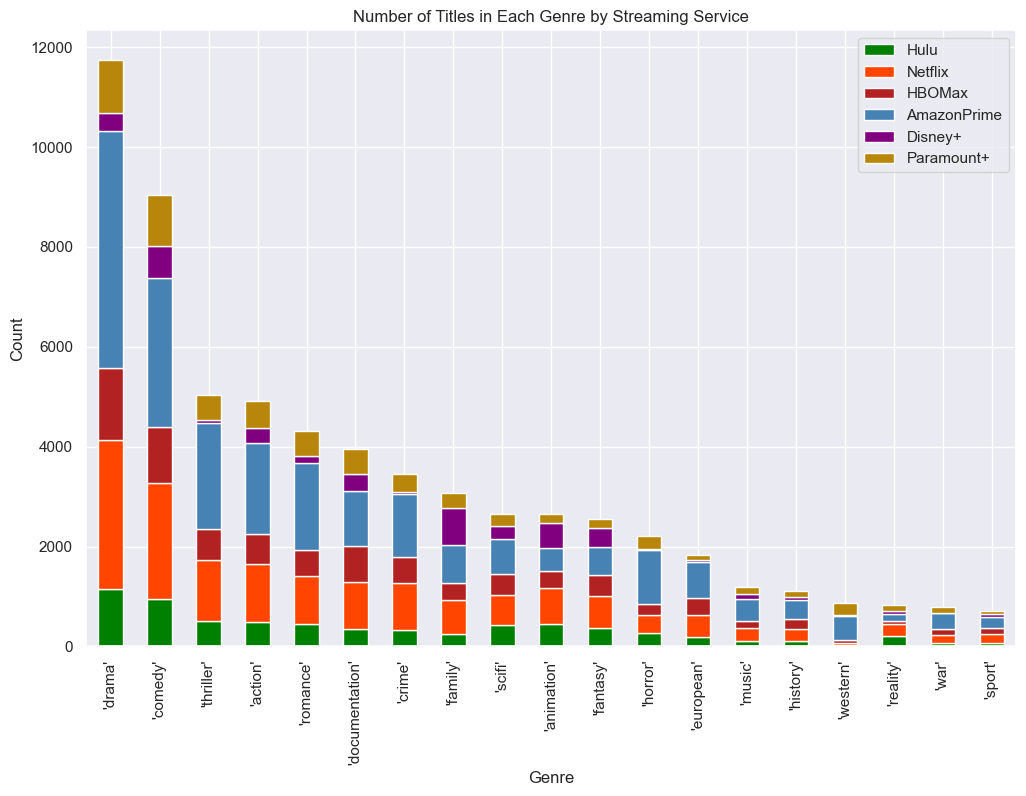

In [558]:
# Plot the dataframe
ax = genres_sorted_by_RowTotals.plot(kind='bar', stacked=True, figsize=(12,8),
                         color = ["green", "orangered", "firebrick", "steelblue", "purple", "darkgoldenrod"])

# Set plot title and labels
ax.set_title('Number of Titles in Each Genre by Streaming Service')
ax.set_xlabel('Genre')
ax.set_ylabel('Count')

# Show the plot
plt.show()

Drama and comedy are the two most frequent genres, with much higher counts than all the rest. Looking at the color bands, they follow a fairly proportional distribution throughout each of the columns. This may be due to Amazon Prime having more titles than the other streaming services so it is likely to have the highest count of titles in each genre. There are a few exceptions to this however. Disney+ makes up one of the bigger chunks for the family genre even though it is a much smaller portion of each other bar. 

Since there are varying numbers of titles in each genre, the percentage of each genre contained within each streaming service will be calculated. This will make the stacked bar chart have bars that are easier to compare to one another.

In [531]:
#Calculating the proportion of each genre that is contained by each streaming service
genre_proportions = genres_sorted_by_RowTotals.div(genre_df_to_viz.sum(axis=1), axis=0)
#Displaying the new data frame
genre_proportions

,Hulu,Netflix,HBOMax,AmazonPrime,Disney+,Paramount+
'action',0.101426,0.235642,0.121792,0.370672,0.061914,0.108554
'animation',0.172218,0.266843,0.130583,0.179788,0.183952,0.066616
'comedy',0.104418,0.257447,0.124017,0.330750,0.071864,0.111505
'crime',0.096037,0.270755,0.153891,0.361874,0.013596,0.103847
'documentation',0.086076,0.241013,0.181266,0.277468,0.088861,0.125316
'drama',0.098383,0.252596,0.122809,0.405447,0.029532,0.091234
'european',0.104887,0.243273,0.186161,0.390994,0.019220,0.055464
'family',0.083225,0.222585,0.109661,0.245104,0.246084,0.093342
'fantasy',0.145646,0.245998,0.168294,0.216322,0.153065,0.070676
'history',0.091403,0.229864,0.169231,0.358371,0.037104,0.114027


Now, the values in each column add up to 1. This will make all of the bars have the same height. By focusing on one bar at a time, the reader can see which streaming service has the most titles of their favorite genres. By focusing on one color band at a time, the reader can see what genre is most commonly found on a particular streaming service.

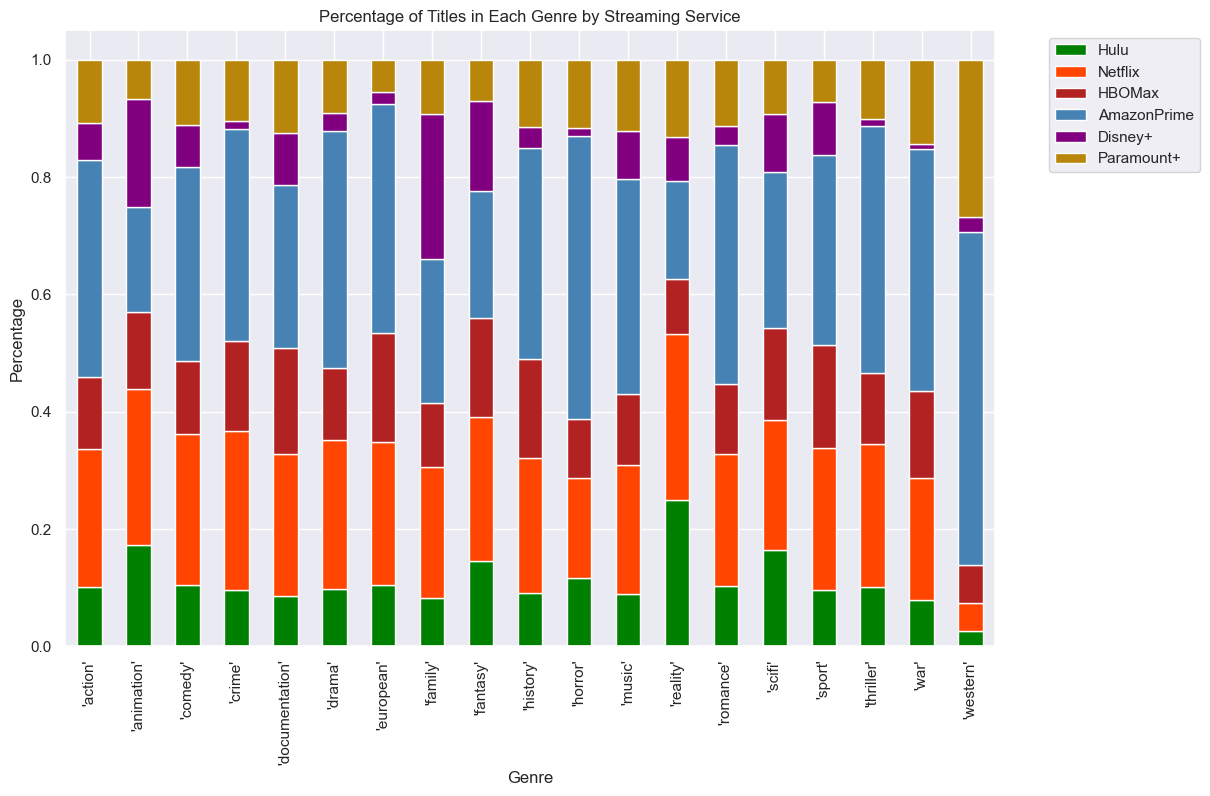

In [458]:
# Plot the dataframe
ax = genre_proportions.plot(kind='bar', stacked=True, figsize=(12,8),
                         color = ["green", "orangered", "firebrick", "steelblue", "purple", "darkgoldenrod"])

# Set plot title and labels
ax.set_title('Percentage of Titles in Each Genre by Streaming Service')
ax.set_xlabel('Genre')
ax.set_ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# Show the plot
plt.show()

Even though there are a lot fewer titles in the sport and western genres for example, it is now easy to see which streaming services contain the most of those genres. Fans of reality TV will find much to enjoy on Hulu and Netflix, while Disney+ is the best service for those seeking family friendly content. Paramount+ has a large percentage of western titles, especially considering the smaller number of titles available on that service overall. HBOMax seems to have a fairly even split among all of the genres considered in this data set.

Unlike the previous data frames, the following data frame contains the percentage of each genre within each streaming service. In other words, each column adds to 1 now instead of each row. This data will be used to create a heatmap that shows the highest concentration of each genre within each streaming service.

In [459]:
#Calculating the percentage of titles in each genre on each streaming service
service_proportions_by_genre = genres_sorted_by_totals.div(genre_df_to_viz.sum(axis=0), axis=1)
#Showing the data frame
service_proportions_by_genre

,Hulu,Netflix,HBOMax,AmazonPrime,Disney+,Paramount+
'drama',0.171082,0.196713,0.173313,0.215908,0.083675,0.165177
'comedy',0.139559,0.154096,0.134518,0.135373,0.156499,0.155162
'thriller',0.075329,0.081389,0.073505,0.096034,0.013745,0.078737
'action',0.073701,0.076683,0.071823,0.082484,0.073306,0.082126
'romance',0.065266,0.064356,0.061734,0.079402,0.033277,0.075501
'documentation',0.050318,0.063097,0.085996,0.049671,0.084639,0.076271
'crime',0.049134,0.062036,0.063896,0.056696,0.011333,0.055316
'family',0.037739,0.045201,0.040356,0.034036,0.181818,0.044068
'scifi',0.064822,0.039038,0.049964,0.031951,0.063902,0.037596
'animation',0.067338,0.046726,0.041436,0.021527,0.117193,0.027119


On the following heatmap, darker rectangles represent a higher percentage genre within that streaming service. By looking at the heatmap one column at a time, the darkest rectangle will show the genre with the greatest number of titles on that service.

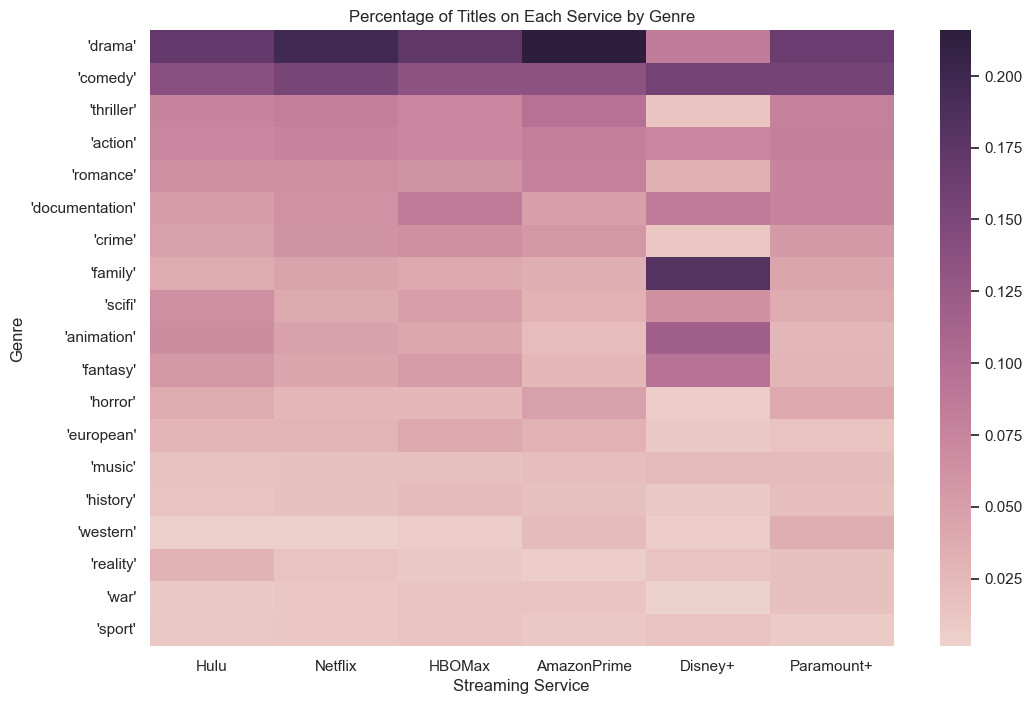

In [533]:
#Expanding the plot space so the heat map rectangles are larger
plt.figure(figsize = (12, 8));
#Creating the heatmap of the proportions of each service for each genre
ax = sns.heatmap(service_proportions_by_genre, cmap=sns.cubehelix_palette(as_cmap=True));
ax.set(title = "Percentage of Titles on Each Service by Genre", xlabel = "Streaming Service", 
      ylabel = "Genre");

The most common genres across all streaming services are drama and comedy, although Disney+ has significantly more family content than any of the other services, while having significantly less crime content. More than 1 out of every 5 titles on Netflix and Amazon Prime are dramas. The high levels of drama and also comedy may indicate that the streaming service providers see these genres as appealing to the largest markets.

Since the proportions of each genre may be very different for TV shows and movies, the data will be separated into two data frames and then re-visualized using the stacked bar charts.

In [469]:
#Creating a new data frame containing only TV shows
df_all_show_genres = df_all_genres[df_all_genres["type"] == "SHOW"]

#Using the count_genres function to get the genre counts for just the shows
show_dict = count_genres(df_all_show_genres)

# Create a dataframe from the count_genres output
show_df_to_viz = pd.DataFrame(show_dict)

# Transpose the dataframe for easier plotting
show_df_to_viz = show_df_to_viz.transpose()

#Getting rid of titles without a genre
show_df_to_viz.sort_index(inplace = True)

show_df_to_viz.drop(index=show_df_to_viz.index[0],axis=0,inplace=True)

#Calculating the percentage of each genre on each streaming service
show_proportions = show_df_to_viz.div(show_df_to_viz.sum(axis=1), axis=0)
#Dropping the missing genre row
show_proportions.drop(index=show_proportions.index[-1],axis=0,inplace=True)
#Sorting the data frame in alphabetical order of genre
show_proportions = show_proportions.sort_index()
#Display the data frame
show_proportions

,Hulu,Netflix,HBOMax,AmazonPrime,Disney+,Paramount+
'action',0.254379,0.334349,0.109673,0.143945,0.089871,0.067784
'animation',0.251938,0.273256,0.114987,0.186693,0.096899,0.076227
'comedy',0.225603,0.297906,0.133544,0.170288,0.069933,0.102726
'crime',0.208595,0.409853,0.138365,0.162474,0.017820,0.062893
'documentation',0.120248,0.301503,0.116711,0.212202,0.104332,0.145004
'drama',0.223173,0.389305,0.113725,0.191800,0.031016,0.050980
'european',0.171254,0.302752,0.116208,0.354740,0.009174,0.045872
'family',0.126878,0.276294,0.095159,0.185309,0.176962,0.139399
'fantasy',0.260736,0.322086,0.121677,0.133947,0.093047,0.068507
'history',0.132013,0.359736,0.095710,0.260726,0.029703,0.122112


The following stacked bar chart shows the proportion of TV shows in each genre separated by the streaming service those titles are available on.

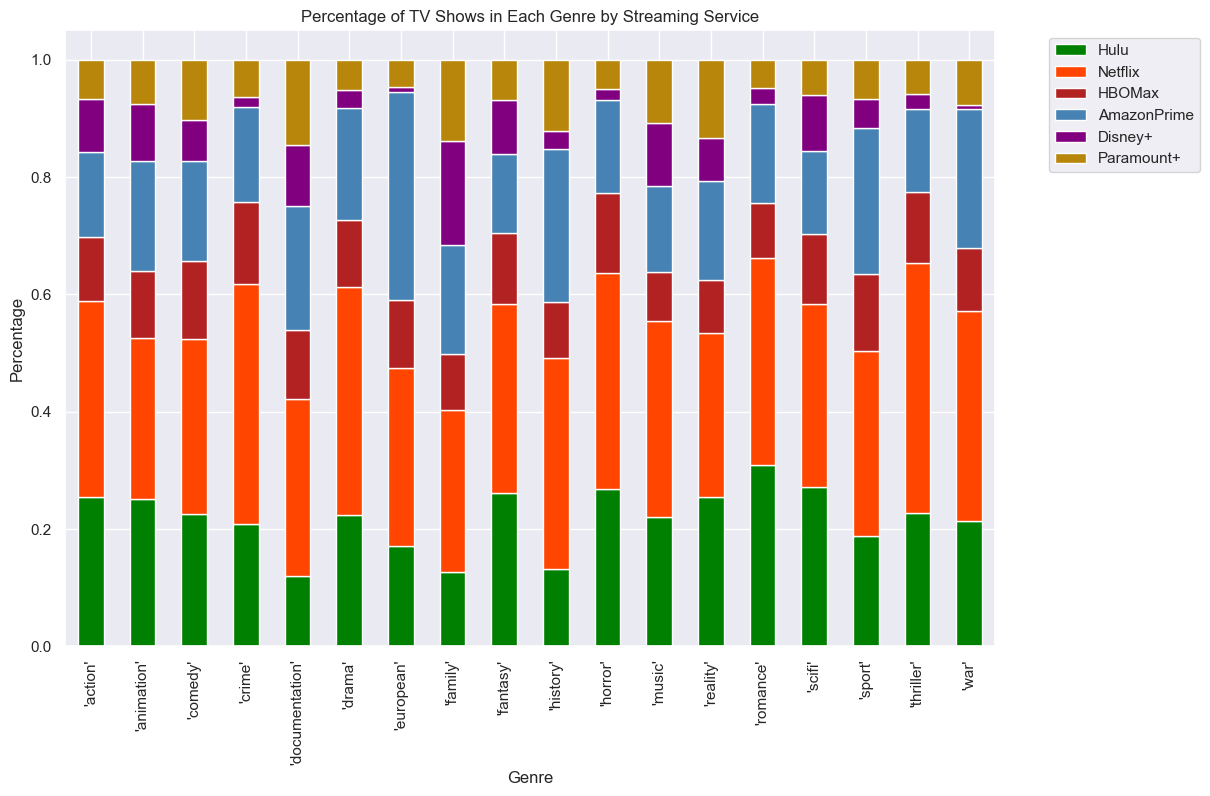

In [470]:
# Plot the dataframe
ax = show_proportions.plot(kind='bar', stacked=True, figsize=(12,8),
                         color = ["green", "orangered", "firebrick", "steelblue", "purple", "darkgoldenrod"])

# Set plot title and labels
ax.set_title('Percentage of TV Shows in Each Genre by Streaming Service')
ax.set_xlabel('Genre')
ax.set_ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# Show the plot
plt.show()

This stacked bar chart should be viewed in the same way as the previous one, giving the reader the ability to pinpoint the specific genres they are interested in and see what streaming service might be the best for them.

Lastly, the same data frame will be created, this time for all the titles that are movies.

In [475]:
#Creating the data frame of just movies
df_all_movie_genres = df_all_genres[df_all_genres["type"] == "MOVIE"]

#Getting the genre counts for each streaming service
movie_dict = count_genres(df_all_movie_genres)
# Create a dataframe from the count_genres output
movie_df_to_viz = pd.DataFrame(movie_dict)

# Transpose the dataframe for easier plotting
movie_df_to_viz = movie_df_to_viz.transpose()

#Getting rid of titles without a genre
movie_df_to_viz.sort_index(inplace = True)
movie_df_to_viz.drop(index=movie_df_to_viz.index[0],axis=0,inplace=True)

#Calculating the percentage of each genre on each streaming service
movie_proportions = movie_df_to_viz.div(movie_df_to_viz.sum(axis=1), axis=0)
#Dropping the missing genre row
movie_proportions.drop(index=movie_proportions.index[-1],axis=0,inplace=True)
#Sorting the data frame in alphabetical order of genre name
movie_proportions = movie_proportions.sort_index()
#Display the data frame
movie_proportions

,Hulu,Netflix,HBOMax,AmazonPrime,Disney+,Paramount+
'action',0.045594,0.199611,0.126216,0.453433,0.051710,0.123436
'animation',0.059415,0.257770,0.152651,0.170018,0.307130,0.053016
'comedy',0.057231,0.241692,0.120308,0.393231,0.072615,0.114923
'crime',0.053136,0.217739,0.159808,0.437875,0.011986,0.119457
'documentation',0.072366,0.216744,0.207166,0.303654,0.082653,0.117418
'drama',0.059251,0.209726,0.125657,0.472443,0.029067,0.103857
'european',0.090361,0.230254,0.201473,0.398929,0.021419,0.057564
'family',0.055198,0.188103,0.118971,0.283494,0.290461,0.063773
'fantasy',0.074542,0.198989,0.197094,0.267214,0.190145,0.072015
'history',0.076060,0.180798,0.197007,0.395262,0.039900,0.110973


This final stacked bar chart will show the percentage of movies in each genre available on each streaming service.

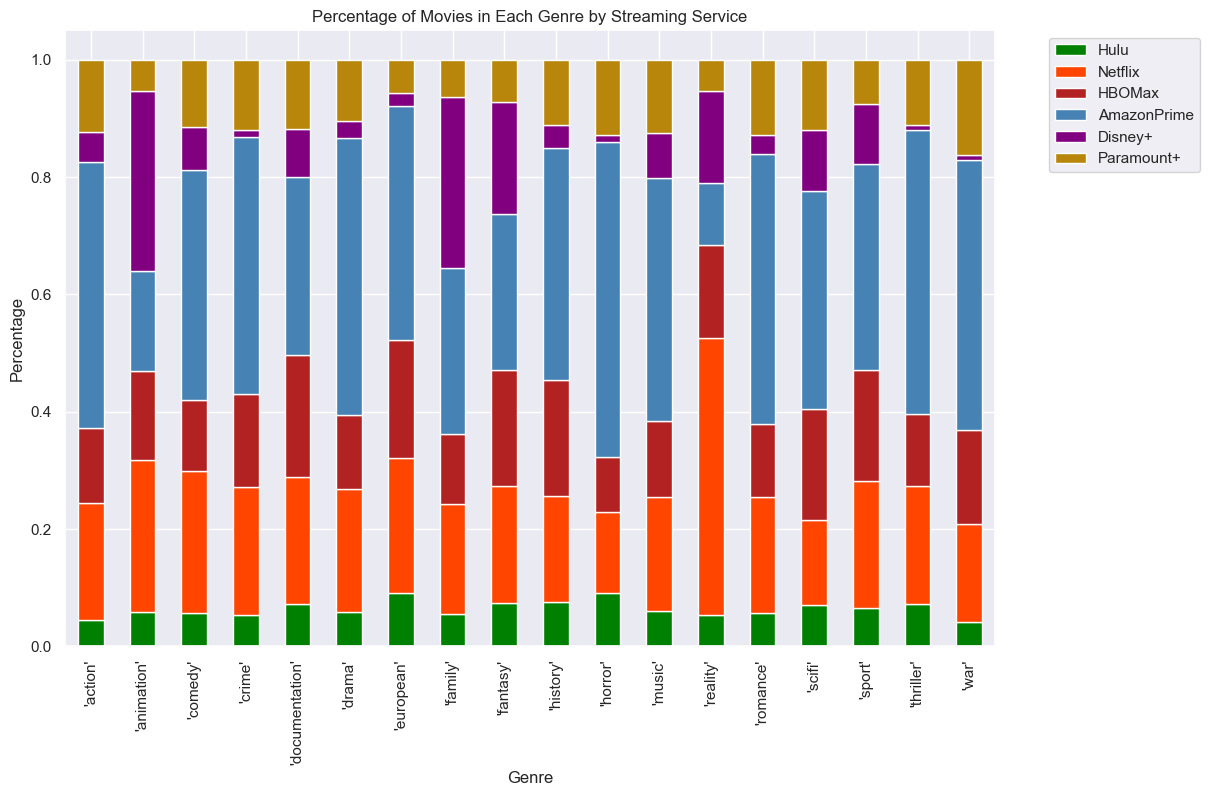

In [476]:
# Plot the dataframe
ax = movie_proportions.plot(kind='bar', stacked=True, figsize=(12,8),
                         color = ["green", "orangered", "firebrick", "steelblue", "purple", "darkgoldenrod"])

# Set plot title and labels
ax.set_title('Percentage of Movies in Each Genre by Streaming Service')
ax.set_xlabel('Genre')
ax.set_ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# Show the plot
plt.show()

### 2. What service has the highest rated movies and shows?

This question is intended to help the reader who is just interested in watching the most acclaimed movies and shows. Those that are rated the most highly are likely to be those that are the most watched among a random audience of viewers. 

#### Top Rated High Profile Movies and Shows on Each Service

First, the highest rated movies and shows on each service will be displayed. Looking at the top 5 rated movies and shows based on their IMDB scores on each service could help them narrow down their choice of service based on their interests. Since a very niche program could receive a small number of votes and have an extremely high score, only those with more than 7,800 votes will be considered. This number is chosen because this would place all the shows in the upper quartile of the data in terms of number of votes. This means these are the highest rated shows among only those with large popularity, which have been deemed as "high profile".

In [45]:
#Displaying the summary of the imdb_votes column
df_all["imdb_votes"].describe()

count    2.305200e+04
mean     2.579271e+04
std      1.052111e+05
min      5.000000e+00
25%      2.200000e+02
50%      1.218500e+03
75%      7.807000e+03
max      2.555504e+06
Name: imdb_votes, dtype: float64

In [58]:
#Top 5 Amazon Prime movies
amazon[(amazon["type"] == "MOVIE") & (amazon["imdb_votes"] > 7800)].sort_values("imdb_score", ascending = False).head(5)


,id,service,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,Combined_score
9052,tm1108724,AmazonPrime,Jai Bhim,MOVIE,A pregnant woman from a primitive tribal commu...,2021,NaN,164,"['drama', 'crime']",['IN'],NaN,tt15097216,9.3,175187.0,6.051,7.4,8.35
7858,tm810763,AmazonPrime,Soorarai Pottru,MOVIE,"Nedumaaran Rajangam ""Maara"" sets out to make t...",2020,NaN,149,"['drama', 'action']",['IN'],NaN,tt10189514,9.2,109759.0,4.146,7.9,8.55
8156,tm244275,AmazonPrime,Peranbu,MOVIE,"A single father tries to raise his daughter, w...",2019,NaN,147,['drama'],['IN'],NaN,tt7738784,9.1,14708.0,2.508,7.9,8.50
9199,tm1086831,AmazonPrime,#Home,MOVIE,"The humble, technology-challenged Oliver Twist...",2021,NaN,162,"['drama', 'family']",['IN'],NaN,tt10534500,9.0,12325.0,2.271,7.8,8.40
6938,tm325150,AmazonPrime,Pariyerum Perumal,MOVIE,A law student from a lower caste begins a frie...,2018,PG,155,"['romance', 'drama']",['IN'],NaN,tt8176054,8.8,15150.0,4.868,8.0,8.40


The top 5 movies on Amazon Prime were all produced in India and are all recently released drama movies.

In [59]:
#Top 5 Amazon Prime shows
amazon[(amazon["type"] == "SHOW") & (amazon["imdb_votes"] > 7800)].sort_values("imdb_score", ascending = False).head(5)


,id,service,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,Combined_score
7422,ts86600,AmazonPrime,The Chosen,SHOW,The life of Christ through the eyes of those w...,2019,TV-G,47,"['drama', 'history']",['US'],2.0,tt9471404,9.4,25538.0,30.771,9.4,9.40
8978,ts296021,AmazonPrime,Clarkson's Farm,SHOW,Follow Jeremy Clarkson as he embarks on his la...,2021,TV-PG,48,"['reality', 'documentation', 'comedy']",['GB'],1.0,tt10541088,9.1,31981.0,18.178,8.6,8.85
4577,ts37645,AmazonPrime,Nathan For You,SHOW,"Self-proclaimed business expert, writer, direc...",2013,TV-14,25,"['comedy', 'documentation']",['US'],4.0,tt2297757,8.9,25396.0,10.796,8.0,8.45
7841,ts237536,AmazonPrime,Panchayat,SHOW,"Panchayat is a comedy-drama, which captures th...",2020,TV-14,30,"['drama', 'comedy']",['IN'],2.0,tt12004706,8.8,50358.0,5.753,8.4,8.60
5287,ts8,AmazonPrime,Better Call Saul,SHOW,Six years before Saul Goodman meets Walter Whi...,2015,TV-MA,49,"['comedy', 'drama', 'crime']",['US'],6.0,tt3032476,8.8,404920.0,352.657,8.5,8.65


The top 5 shows on Amazon Prime are more varied than the movies. These shows were produced in the U.S., Great Britain, Japan, and India. They are also a mix of genres from history to animated.

In [60]:
#Top 5 Disney+ movies
disney[(disney["type"] == "MOVIE") & (disney["imdb_votes"] > 7800)].sort_values("imdb_score", ascending = False).head(5)


,id,service,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
93,tm2,Disney+,The Empire Strikes Back,MOVIE,"The epic saga continues as Luke Skywalker, in ...",1980,PG,124,"['scifi', 'action', 'fantasy']",['US'],NaN,tt0080684,8.7,1248319.0,27.802,8.4
85,tm1,Disney+,Star Wars,MOVIE,Princess Leia is captured and held hostage by ...,1977,PG,125,"['scifi', 'action', 'fantasy']",['US'],NaN,tt0076759,8.6,1321489.0,77.321,8.2
290,tm113629,Disney+,The Lion King,MOVIE,A young lion prince is cast out of his pride b...,1994,G,89,"['drama', 'family', 'animation']",['US'],NaN,tt0110357,8.5,1023813.0,145.278,8.3
1378,tm1092922,Disney+,The Rescue,MOVIE,"A chronicle of the enthralling, against-all-od...",2021,PG,107,"['action', 'thriller', 'drama', 'documentation']",['US'],NaN,tt9098872,8.4,9857.0,11.202,8.0
434,tm25151,Disney+,WALL·E,MOVIE,WALL·E is the last robot left on an Earth that...,2008,G,98,"['scifi', 'family', 'fantasy', 'romance', 'ani...",['US'],NaN,tt0910970,8.4,1083424.0,75.615,8.1


The top rated Disney+ movies are a mix of "classics" in American culture alongside some recent releases. Two of the Star Wars movies top the charts along with the Lion King. Many people are familiar with the animated Disney movies from the 1990s and could be a great draw towards choosing this service.

In [61]:
#Top 5 Disney+ shows
disney[(disney["type"] == "SHOW") & (disney["imdb_votes"] > 7800)].sort_values("imdb_score", ascending = False).head(5)



,id,service,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
819,ts301931,Disney+,Cosmos: A Spacetime Odyssey,SHOW,An exploration of our discovery of the laws of...,2014,TV-PG,43,['documentation'],"['FR', 'PT']",1.0,tt2395695,9.3,119455.0,NaN,NaN
1367,ts299852,Disney+,The Beatles: Get Back,SHOW,Documentary about the music group The Beatles ...,2021,NaN,156,"['documentation', 'music']","['NZ', 'GB', 'US']",1.0,tt9735318,9.0,19391.0,13.597,8.5
1142,ts84392,Disney+,The Mandalorian,SHOW,"After the fall of the Galactic Empire, lawless...",2019,TV-14,40,"['scifi', 'action', 'fantasy']",['US'],3.0,tt8111088,8.7,425001.0,166.305,8.5
204,ts20711,Disney+,The Simpsons,SHOW,The satiric adventures of a working-class fami...,1989,TV-14,27,"['animation', 'comedy']",['US'],34.0,tt0096697,8.7,394764.0,516.381,7.9
906,ts21903,Disney+,Marvel's Daredevil,SHOW,Lawyer-by-day Matt Murdock uses his heightened...,2015,TV-MA,53,"['action', 'crime', 'drama', 'thriller', 'fant...",['US'],3.0,tt3322312,8.6,419503.0,109.111,8.1


The Mandalorian and the Simpsons are among the top rated shows on Disney+. Both of these shows present a significant draw towards the service from a variety of watchers.

In [71]:
#Top 5 HBOMax movies
hbo[(hbo["type"] == "MOVIE") & (hbo["imdb_votes"] > 7800)].sort_values("imdb_score", ascending = False).head(5)


,id,service,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
725,tm119206,HBOMax,The Shawshank Redemption,MOVIE,Framed in the 1940s for the double murder of h...,1994,R,142,"['crime', 'drama']",['US'],NaN,tt0111161,9.3,2548100.0,66.224,8.7
1035,tm56184,HBOMax,The Dark Knight,MOVIE,Batman raises the stakes in his war on crime. ...,2008,PG-13,152,"['thriller', 'action', 'crime', 'drama']","['GB', 'US']",NaN,tt0468569,9.0,2555504.0,102.667,8.5
1209,tm142381,HBOMax,The Lord of the Rings: The Return of the King,MOVIE,Aragorn is revealed as the heir to the ancient...,2003,PG-13,201,"['fantasy', 'action', 'drama']","['NZ', 'US']",NaN,tt0167260,9.0,1776725.0,96.115,8.5
1151,tm115982,HBOMax,The Lord of the Rings: The Two Towers,MOVIE,Frodo and Sam are trekking to Mordor to destro...,2002,PG-13,223,"['fantasy', 'action', 'drama']","['NZ', 'US']",NaN,tt0167261,8.8,1604677.0,109.721,8.4
899,tm24890,HBOMax,Dave Chappelle: Killin' Them Softly,MOVIE,Dave Chappelle returns for a stand-up to D.C. ...,2000,NaN,57,"['comedy', 'documentation']",['US'],NaN,tt0251654,8.8,9877.0,5.792,8.1


None of the top 5 HBOMax movies have been released even in the last decade. HBO's best movie offerings also tend toward the action and fantasy genres featuring a Batman movie and two of the original Lord of the Rings trilogy. Both of these franchises would certainly draw a lot of viewers to this service.

In [72]:
#Top 5 HBOMax shows
hbo[(hbo["type"] == "SHOW") & (hbo["imdb_votes"] > 7800)].sort_values("imdb_score", ascending = False).head(5)


,id,service,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1038,ts17149,HBOMax,Band of Brothers,SHOW,Drawn from interviews with survivors of Easy C...,2001,TV-MA,59,"['war', 'drama', 'history', 'action']",['US'],1.0,tt0185906,9.4,440706.0,62.034,8.4
2531,ts88632,HBOMax,Chernobyl,SHOW,The true story of one of the worst man-made ca...,2019,TV-MA,65,"['drama', 'history', 'thriller', 'documentation']",['US'],1.0,tt7366338,9.4,693955.0,64.507,8.6
1030,ts22047,HBOMax,The Wire,SHOW,Told from the points of view of both the Balti...,2002,TV-MA,59,"['drama', 'thriller', 'crime']",['US'],5.0,tt0306414,9.3,325150.0,36.030,8.5
1878,ts20233,HBOMax,Rick and Morty,SHOW,Rick is a mentally-unbalanced but scientifical...,2013,TV-MA,22,"['scifi', 'action', 'animation', 'comedy']",['US'],5.0,tt2861424,9.2,473951.0,238.434,8.8
1706,ts2,HBOMax,Game of Thrones,SHOW,Seven noble families fight for control of the ...,2011,TV-MA,58,"['scifi', 'action', 'drama', 'fantasy', 'roman...",['US'],8.0,tt0944947,9.2,1983794.0,492.101,8.4


There is a general public perception of HBO being a platform for more mature programs, and the top 5 list of shows backs up that claim. All of these shows are rated TV-MA, so clearly the best offerings on HBOMax are not for children. Most of these shows are dramatic action oriented programs, although the animated comedy "Rick and Morty" is the fourth highest rated.

In [62]:
#Top 5 Hulu movies
hulu[(hulu["type"] == "MOVIE") & (hulu["imdb_votes"] > 7800)].sort_values("imdb_score", ascending = False).head(5)


,id,service,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1576,tm414170,Hulu,Parasite,MOVIE,"All unemployed, Ki-taek's family takes peculia...",2019,R,132,"['thriller', 'horror', 'comedy', 'drama']",['KR'],NaN,tt6751668,8.5,742045.0,77.209,8.5
24,tm180542,Hulu,Once Upon a Time in America,MOVIE,A former Prohibition-era Jewish gangster retur...,1984,R,229,"['drama', 'crime', 'european']","['US', 'IT']",NaN,tt0087843,8.3,342335.0,21.322,8.4
82,tm192099,Hulu,L.A. Confidential,MOVIE,Three detectives in the corrupt and brutal L.A...,1997,R,138,"['thriller', 'crime', 'drama']",['US'],NaN,tt0119488,8.3,570894.0,22.527,7.8
260,tm46003,Hulu,A Beautiful Mind,MOVIE,John Nash is a brilliant but asocial mathemati...,2001,PG-13,135,['drama'],['US'],NaN,tt0268978,8.2,909359.0,27.030,7.9
641,tm31116,Hulu,The Act of Killing,MOVIE,In a place where killers are celebrated as her...,2012,NaN,159,"['documentation', 'european', 'crime', 'histor...","['DK', 'ID', 'NO', 'GB']",NaN,tt2375605,8.2,37673.0,5.508,7.7


The top movies on Hulu are mostly for mature audiences with the lowest rating being PG-13. This indicates that the highest quality content on this service might not be geared towards children. Parasite made significant waves on social media when it released and could be a strong factor in someone's decision.

In [63]:
#Top 5 Hulu shows
hulu[(hulu["type"] == "SHOW") & (hulu["imdb_votes"] > 7800)].sort_values("imdb_score", ascending = False).head(5)


,id,service,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
768,ts20233,Hulu,Rick and Morty,SHOW,Rick is a mentally-unbalanced but scientifical...,2013,TV-MA,22,"['scifi', 'action', 'animation', 'comedy']",['US'],5.0,tt2861424,9.2,473951.0,238.434,8.8
224,ts21482,Hulu,Fullmetal Alchemist: Brotherhood,SHOW,Edward and Alphonse Elric's reckless disregard...,2009,TV-14,29,"['scifi', 'action', 'animation', 'comedy', 'dr...",['JP'],1.0,tt1355642,9.1,156503.0,110.534,8.7
256,ts11313,Hulu,DEATH NOTE,SHOW,Light Yagami is an ace student with great pros...,2006,TV-14,24,"['scifi', 'animation', 'crime', 'drama', 'fant...",['JP'],1.0,tt0877057,9.0,302147.0,104.037,8.7
624,ts32835,Hulu,Hunter x Hunter,SHOW,Twelve-year-old Gon Freecss one day discovers ...,2011,TV-14,23,"['drama', 'action', 'comedy', 'crime', 'animat...",['JP'],3.0,tt2098220,9.0,87857.0,117.924,8.8
202,ts2817,Hulu,Firefly,SHOW,"In the year 2517, after the arrival of humans ...",2002,TV-14,47,"['scifi', 'drama']",['US'],1.0,tt0303461,9.0,259849.0,28.461,8.3


The top shows on Hulu are also not intended for young children with the lowest rating being TV-14. Interestingly, 4 of the 5 shows are animated and 3 of those 4 are animes produced in Japan. If someone is interested in watching popular anime and animated shows, Hulu could be a good choice for them.

In [64]:
#Top 5 Netflix movies
netflix[(netflix["type"] == "MOVIE") & (netflix["imdb_votes"] > 7800)].sort_values("imdb_score", ascending = False).head(5)



,id,service,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
3271,tm853783,Netflix,David Attenborough: A Life on Our Planet,MOVIE,The story of life on our planet by the man who...,2020,PG,83,['documentation'],['GB'],NaN,tt11989890,8.9,31625.0,15.935,8.500
237,tm92641,Netflix,Inception,MOVIE,"Cobb, a skilled thief who commits corporate es...",2010,PG-13,148,"['action', 'scifi', 'music', 'thriller']","['US', 'GB']",NaN,tt1375666,8.8,2294231.0,108.284,8.400
97,tm122434,Netflix,Forrest Gump,MOVIE,A man with a low IQ has accomplished great thi...,1994,PG-13,142,"['drama', 'romance']",['US'],NaN,tt0109830,8.8,2021343.0,63.449,8.478
4818,tm1038686,Netflix,Bo Burnham: Inside,MOVIE,"Stuck in COVID-19 lockdown, US comedian and mu...",2021,R,87,"['comedy', 'drama', 'music', 'reality']",['US'],NaN,tt14544192,8.7,44074.0,11.434,8.200
435,tm129763,Netflix,Anbe Sivam,MOVIE,Nalla Sivam and Anbarasu meet under different ...,2003,NaN,160,"['comedy', 'drama']",['IN'],NaN,tt0367495,8.7,21167.0,4.634,7.500


Netflix has a good amount of variety in its top 5 movies. A nature documentary takes the top spot, followed by Inception. One of Bo Burnham's recent comedy specials is the 4th ranked on the list. 

In [65]:
#Top 5 Netflix shows
netflix[(netflix["type"] == "SHOW") & (netflix["imdb_votes"] > 7800)].sort_values("imdb_score", ascending = False).head(5)



,id,service,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
216,ts4,Netflix,Breaking Bad,SHOW,"When Walter White, a New Mexico chemistry teac...",2008,TV-MA,48,"['drama', 'crime', 'thriller']",['US'],5.0,tt0903747,9.5,1775990.0,353.848,8.79
3147,ts85398,Netflix,Our Planet,SHOW,Experience our planet's natural beauty and exa...,2019,TV-G,50,['documentation'],['GB'],1.0,tt9253866,9.3,42259.0,19.942,8.80
233,ts3371,Netflix,Avatar: The Last Airbender,SHOW,"In a war-torn world of elemental magic, a youn...",2005,TV-Y7,24,"['scifi', 'animation', 'action', 'family', 'fa...",['US'],3.0,tt0417299,9.3,303666.0,56.915,8.70
3500,ts90621,Netflix,Kota Factory,SHOW,"Dedicated to Shrimati SL Loney ji, Shri Irodov...",2019,TV-MA,39,"['drama', 'comedy']",['IN'],2.0,tt9432978,9.1,69316.0,9.584,8.30
3068,ts81120,Netflix,The Last Dance,SHOW,A 10-part documentary chronicling the untold s...,2020,TV-MA,50,"['documentation', 'history', 'sport']",['US'],1.0,tt8420184,9.1,115915.0,27.702,8.20


Looking at the top 5 Netflix shows, it is immediately apparent that Breaking Bad would be a serious draw towards this service for many watchers. There is also a good amount of variety in this list, including shows classified as documentaries, drama, sci-fi, and comedy.

In [66]:
#Top 5 Paramount+ movies and shows
paramount[(paramount["type"] == "MOVIE") & (paramount["imdb_votes"] > 7800)].sort_values("imdb_score", ascending = False).head(5)


,id,service,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
549,tm155580,Paramount+,The Godfather,MOVIE,"Spanning the years 1945 to 1955, a chronicle o...",1972,R,175,"['drama', 'crime']",['US'],NaN,tt0068646,9.2,1780564.0,61.778,8.7
552,tm112061,Paramount+,The Godfather: Part II,MOVIE,In the continuing saga of the Corleone crime f...,1974,R,195,"['drama', 'crime']",['US'],NaN,tt0071562,9.0,1230117.0,48.475,8.6
1073,tm112130,Paramount+,Pulp Fiction,MOVIE,"A burger-loving hit man, his philosophical par...",1994,R,154,"['thriller', 'crime', 'drama']",['US'],NaN,tt0110912,8.9,1982722.0,55.923,8.5
1077,tm122434,Paramount+,Forrest Gump,MOVIE,A man with a low IQ has accomplished great thi...,1994,PG-13,142,"['romance', 'comedy', 'drama']",['US'],NaN,tt0109830,8.8,1994599.0,57.114,8.5
1648,tm157099,Paramount+,Interstellar,MOVIE,Interstellar chronicles the adventures of a gr...,2014,PG-13,169,"['scifi', 'drama', 'thriller']","['US', 'GB']",NaN,tt0816692,8.6,1728756.0,122.172,8.4


The top 5 Paramount+ movies are intended for older audiences and tend towards the dramatic. The top 2 movies are part of the Godfather trilogy followed by Pulp Fiction. 

In [67]:
#Top 5 Paramount+ shows
paramount[(paramount["type"] == "SHOW") & (paramount["imdb_votes"] > 7800)].sort_values("imdb_score", ascending = False).head(5)



,id,service,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1249,ts3371,Paramount+,Avatar: The Last Airbender,SHOW,"In a war-torn world of elemental magic, a youn...",2005,TV-Y7,24,"['scifi', 'family', 'fantasy', 'animation', 'a...",['US'],3.0,tt0417299,9.3,297336.0,61.284,8.7
550,ts22109,Paramount+,The Twilight Zone,SHOW,A series of unrelated stories containing drama...,1959,TV-PG,28,"['scifi', 'drama', 'fantasy', 'horror', 'thril...",['US'],5.0,tt0052520,9.1,80605.0,29.897,8.5
1650,ts37645,Paramount+,Nathan For You,SHOW,"Self-proclaimed business expert, writer, direc...",2013,TV-14,25,"['comedy', 'documentation']",['US'],4.0,tt2297757,8.9,25396.0,10.796,8.0
2712,ts272606,Paramount+,1883,SHOW,Follow the Dutton family as they embark on a j...,2021,TV-MA,56,"['western', 'drama']",['US'],1.0,tt13991232,8.8,50954.0,39.327,8.8
928,ts21408,Paramount+,Twin Peaks,SHOW,The body of Laura Palmer is washed up on a bea...,1990,TV-MA,52,"['drama', 'crime', 'thriller']",['US'],3.0,tt0098936,8.8,192204.0,51.975,8.2


Just within the top 5 shows on Paramount+ there is a lot of variety. From the classic "The Twilight Zone" to the surreal "Twin Peaks" and the still popular Nickelodeon cartoon "Avatar: The Last Airbender", many people could find something good to watch in just this list.

#### Calculating the Mean Scores

The mean scores of all the movies and TV shows on each service that have an IMDB or TMDB rating will be calculated.

In [560]:
#Creating a data frame containing the mean IMDB and TMDB scores grouped by each streaming service and type of program
#while ignoring any missing values.
overall_scores = df_all.groupby(["type", "service"])[["imdb_score", "tmdb_score"]].agg(np.nanmean)

#Renaming the columns to reflect what data they contain.
overall_scores = overall_scores.rename(columns = {"imdb_score": "mean_imdb_score", "tmdb_score": "mean_tmdb_score"})

#Rounding the scores in each column so they are easy to read.
overall_scores["mean_imdb_score"] = overall_scores["mean_imdb_score"].round(2)
overall_scores["mean_tmdb_score"] = overall_scores["mean_tmdb_score"].round(2)

#Displaying the DataFrame
overall_scores

mean_imdb_score  mean_tmdb_score
type  service                                      
MOVIE AmazonPrime             5.80             5.79
      Disney+                 6.44             6.68
      HBOMax                  6.77             6.70
      Hulu                    6.13             6.26
      Netflix                 6.25             6.46
      Paramount+              5.85             5.75
SHOW  AmazonPrime             7.12             7.32
      Disney+                 6.94             7.65
      HBOMax                  7.26             7.39
      Hulu                    7.15             7.43
      Netflix                 6.98             7.48
      Paramount+              6.73             7.23

These mean scores will be used to create side-by-side bar charts that will allow the reader to compare the scores of movies and shows across the different streaming services. One of the charts will show the IMDB scores and the other will show the TMDB scores.

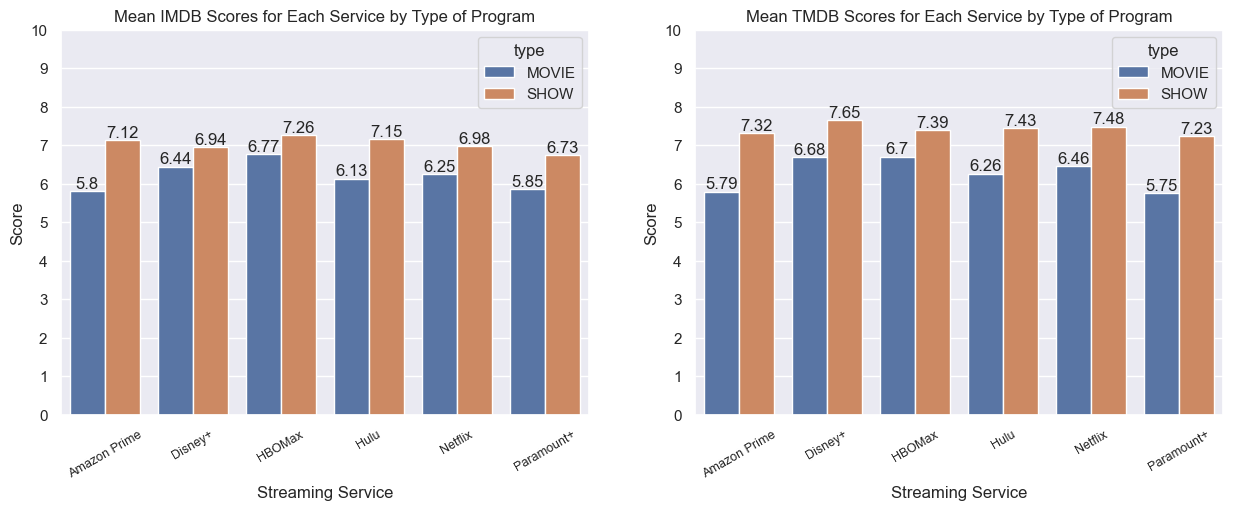

In [561]:
#Resetting the index to use those columns in the visualization
overall_scores = overall_scores.reset_index()

#Setting the plot space so the bar charts can fit side by side
fig, axes = plt.subplots(1, 2, figsize = (15, 5));

#Creating a side by side bar plot of the mean IMDB scores for each program type by service
sns.barplot(ax = axes[0], x = "service", y = "mean_imdb_score", hue = "type", data = overall_scores);

#Setting the title and axes labels for the first bar chart
axes[0].set(title = "Mean IMDB Scores for Each Service by Type of Program", xlabel = "Streaming Service", ylabel = "Score");

#Setting the y-axis labels to make the plots uniformly labeled
axes[0].set_ylim((0, 10));
axes[0].set_yticks([0,1,2,3,4,5,6,7,8,9,10]);

#Setting the x axis labels and rotating the labels so they fit nicer
axes[0].set_xticklabels(["Amazon Prime", "Disney+", "HBOMax", "Hulu", "Netflix", "Paramount+"], rotation = 30, fontsize = 9);

#Labeling each bar with the actual score
for i in axes[0].containers:
    axes[0].bar_label(i,)

#Creating the second bar plot for the mean TMDB scores for each program type by service
sns.barplot(ax = axes[1], x = "service", y = "mean_tmdb_score", hue = "type", data = overall_scores);

#Setting the title and axes labels for the second bar chart
axes[1].set(title = "Mean TMDB Scores for Each Service by Type of Program", xlabel = "Streaming Service", ylabel = "Score");

#Setting the y-axis labels to make the plots uniformly labeled
axes[1].set_ylim((0, 10));
axes[1].set_yticks([0,1,2,3,4,5,6,7,8,9,10]);

#Setting the x axis labels and rotating the labels so they fit nicer
axes[1].set_xticklabels(["Amazon Prime", "Disney+", "HBOMax", "Hulu", "Netflix", "Paramount+"], rotation = 30, fontsize = 9);

#Labeling each bar with the actual score
for i in axes[1].containers:
    axes[1].bar_label(i,)
    

In general, the mean IMDB and TMDB scores are fairly similar. The mean scores for Amazon Prime movies only differ by 0.01. There are a few instances where there are larger differences. For example, Netflix shows have a mean rating on TMDB that is 0.5 points higher than on IMDB and Disney+ shows have a mean rating on TMDB that is 0.71 points higher than on IMDB. 

There are only three instances where the mean IMDB score is higher than the mean TMDB score. These are for Amazon Prime movies, HBOMax movies, and Paramount+ movies.

The mean IMDB scores and TMDB scores are averaged to get an overall average score for each program type for each service since the scores between the two database websites are fairly similar.

In [29]:
#Resetting the indexes on the overall_scores DataFrame to use those columns in the upcoming visualization.
overall_scores["Mean_Overall_Score"] = (overall_scores["mean_imdb_score"] + overall_scores["mean_tmdb_score"]) / 2

#Rounding the scores to 2 decimal points to make the data frame neater
overall_scores["Mean_Overall_Score"] = overall_scores["Mean_Overall_Score"].round(2)

#Resetting the index to use the columns in the upcoming visualization
overall_scores_for_viz = overall_scores.reset_index()

#Showing only the relevant columns
overall_scores_for_viz[["type", "service", "Mean_Overall_Score"]]

,type,service,Mean_Overall_Score
0,MOVIE,AmazonPrime,5.80
1,MOVIE,Disney+,6.56
2,MOVIE,HBOMax,6.74
3,MOVIE,Hulu,6.20
4,MOVIE,Netflix,6.36
5,MOVIE,Paramount+,5.80
6,SHOW,AmazonPrime,7.22
7,SHOW,Disney+,7.30
8,SHOW,HBOMax,7.32
9,SHOW,Hulu,7.29


The following side-by-side bar plot displays those mean overall scores.

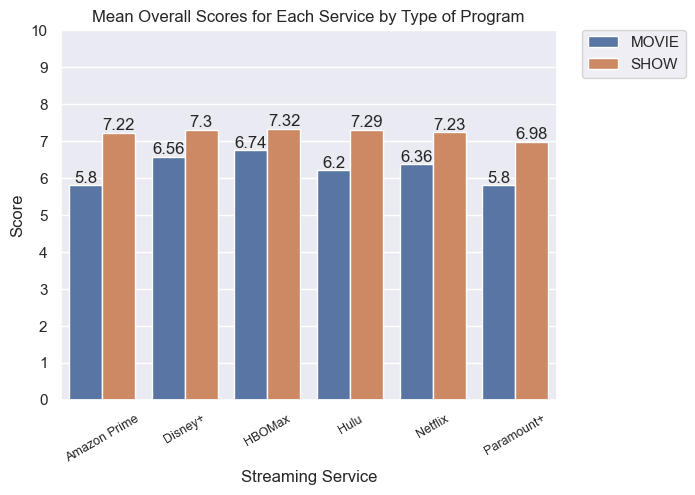

In [80]:
#Creating the bar plot of mean overall score for each program type by streaming service
ax = sns.barplot( x = "service", y = "Mean_Overall_Score", hue = "type", data = overall_scores_for_viz);

#Setting the title and axes labels
ax.set(title = "Mean Overall Scores for Each Service by Type of Program", xlabel = "Streaming Service", ylabel = "Score");

#Setting the y-axis to be the same as the previous two bar charts
ax.set_ylim((0, 10));
ax.set_yticks([0,1,2,3,4,5,6,7,8,9,10]);

#Setting the x-axis labels, size, and rotating so it fits nicer in the plot space
ax.set_xticklabels(["Amazon Prime", "Disney+", "HBOMax", "Hulu", "Netflix", "Paramount+"], rotation = 30, fontsize = 9);

#Placing the legend outside the plot so it doesn't cover any of the bars
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

#Labeling each bar with the actual score
for i in ax.containers:
    ax.bar_label(i,)
    

If someone is only interested in the service with highest rated TV shows or movies on average, they should choose HBOMax. It has the highest mean rating for its movies, beating Disney+ by 0.18 points, and the highest mean rating for its TV shows, again beating Disney+, this time by 0.02 points.

#### Analysis of High Profile Movies and Shows

Restricting this analysis to the "high profile" programs on each service may result in different rankings. In this situation it may be important to focus on shows that are more popular and have received more votes on IMDB. Even if a lesser-known show is of extremely high quality, it might not be a draw towards the service because it lacks presence in online discourse.

In [563]:
#Creating a data frame of high profile titles, those above the 75th percentile in terms of the number of votes on IMDB
high_profile = df_all[df_all["imdb_votes"] > 7800]

In [564]:
#Grouping by type and service again to find the mean IMDB and TMDB scores
high_profile_scores = high_profile.groupby(["type", "service"])[["imdb_score", "tmdb_score"]].agg(np.nanmean)

#Renaming the columns to reflect what data they contain.
high_profile_scores = high_profile_scores.rename(columns = {"imdb_score": "mean_imdb_score", "tmdb_score": "mean_tmdb_score"})

#Rounding the scores in each column so they are easy to read.
high_profile_scores["mean_imdb_score"] = high_profile_scores["mean_imdb_score"].round(2)
high_profile_scores["mean_tmdb_score"] = high_profile_scores["mean_tmdb_score"].round(2)

#Displaying the DataFrame
high_profile_scores

mean_imdb_score  mean_tmdb_score
type  service                                      
MOVIE AmazonPrime             6.57             6.54
      Disney+                 6.59             6.75
      HBOMax                  6.79             6.77
      Hulu                    6.52             6.54
      Netflix                 6.52             6.64
      Paramount+              6.69             6.66
SHOW  AmazonPrime             7.84             7.59
      Disney+                 7.47             7.81
      HBOMax                  7.90             7.74
      Hulu                    7.71             7.63
      Netflix                 7.54             7.67
      Paramount+              7.27             7.52

In [565]:
#Resetting the index so those columns can be used in the visualization
high_profile_scores = high_profile_scores.reset_index()

The following bar plots show the mean IMDB and TMDB scores for each type of program on each streaming service for just the high profile movies and TV shows.

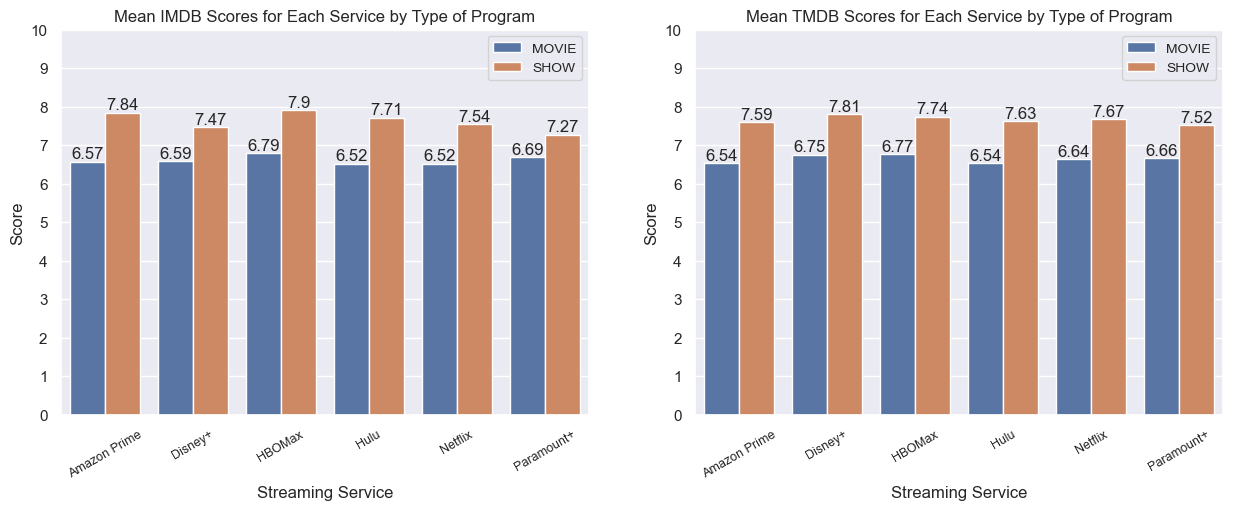

In [566]:
#Setting the plot space so both bar plots can fit next to one another
fig, axes = plt.subplots(1, 2, figsize = (15, 5));

#Creating the first bar plot of mean IMDB scores for each program type by streaming service
sns.barplot(ax = axes[0], x = "service", y = "mean_imdb_score", hue = "type", data = high_profile_scores);

#Setting the title and axes labels of the first bar plot
axes[0].set(title = "Mean IMDB Scores for Each Service by Type of Program", xlabel = "Streaming Service", ylabel = "Score");

#Setting the y-axis options so the plots have the same scale
axes[0].set_ylim((0, 10));
axes[0].set_yticks([0,1,2,3,4,5,6,7,8,9,10]);

#Setting the x-axis labels, font size, and rotating text so it's easy to read
axes[0].set_xticklabels(["Amazon Prime", "Disney+", "HBOMax", "Hulu", "Netflix", "Paramount+"], rotation = 30, fontsize = 9);

#Labeling each bar with the actual scores
for i in axes[0].containers:
    axes[0].bar_label(i,)

#Changing the size of the legend so it doesn't cover up any of the bars
axes[0].legend(fontsize = 10);

#Creating the second bar plot of mean TMDB scores for each program type by streaming service
sns.barplot(ax = axes[1], x = "service", y = "mean_tmdb_score", hue = "type", data = high_profile_scores);

#Setting the title and axes labels of the second bar plot
axes[1].set(title = "Mean TMDB Scores for Each Service by Type of Program", xlabel = "Streaming Service", ylabel = "Score");

#Setting the y-axis options so the plots have the same scale
axes[1].set_ylim((0, 10));
axes[1].set_yticks([0,1,2,3,4,5,6,7,8,9,10]);

#Setting the x-axis labels, font size, and rotating text so it's easy to read
axes[1].set_xticklabels(["Amazon Prime", "Disney+", "HBOMax", "Hulu", "Netflix", "Paramount+"], rotation = 30, fontsize = 9);

#Labeling each bar with the actual scores
for i in axes[1].containers:
    axes[1].bar_label(i,)

#Changing the size of the legend so it doesn't cover up any of the bars
axes[1].legend(fontsize = 10);

The high profile titles appear to have higher average scores than when all of the titles are included. Although the scores are now greater, the rankings of the services are the same. HBOMax still has the greatest mean scores for movies and TV shows on IMDB, although Disney+ now has the highest mean score for TV shows on TMDB.

The overall mean scores, calculated by averaging the IMDB and TMDB scores, will now be calculated for the high profile titles to create one more visualization to conclude this section.

In [567]:
#Resetting the indexes on the overall_scores DataFrame to use those columns in the upcoming visualization.
high_profile_scores["Mean_Overall_Score"] = (high_profile_scores["mean_imdb_score"] + high_profile_scores["mean_tmdb_score"]) / 2

#Rounding the scores to 2 decimal places for neatness
high_profile_scores["Mean_Overall_Score"] = high_profile_scores["Mean_Overall_Score"].round(2)

#Resetting the index so the columns can be used in the visualization
high_profile_scores_for_viz = high_profile_scores.reset_index()

#Displaying only the relevant columns from the data frame
high_profile_scores_for_viz[["type", "service", "Mean_Overall_Score"]]


,type,service,Mean_Overall_Score
0,MOVIE,AmazonPrime,6.56
1,MOVIE,Disney+,6.67
2,MOVIE,HBOMax,6.78
3,MOVIE,Hulu,6.53
4,MOVIE,Netflix,6.58
5,MOVIE,Paramount+,6.68
6,SHOW,AmazonPrime,7.72
7,SHOW,Disney+,7.64
8,SHOW,HBOMax,7.82
9,SHOW,Hulu,7.67


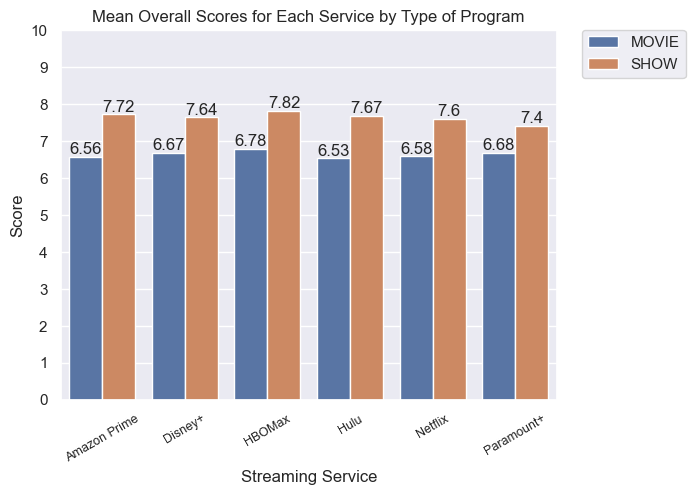

In [97]:
#Creating the bar plot of mean overall scores for each program type by streaming service for the high profile titles
ax = sns.barplot( x = "service", y = "Mean_Overall_Score", hue = "type", data = high_profile_scores_for_viz);

#Setting the title and axes labels
ax.set(title = "Mean Overall Scores for Each Service by Type of Program", xlabel = "Streaming Service", ylabel = "Score");

#Setting the y-axis to match the previous bar plots
ax.set_ylim((0, 10));
ax.set_yticks([0,1,2,3,4,5,6,7,8,9,10]);

#Setting the x-axis labels, font size, and rotating the text for clarity
ax.set_xticklabels(["Amazon Prime", "Disney+", "HBOMax", "Hulu", "Netflix", "Paramount+"], rotation = 30, fontsize = 9);

#Setting the legend next to the plot to avoid covering up any of the bars
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

#Labeling the bars with the actual scores
for i in ax.containers:
    ax.bar_label(i,)

    

Even when looking at just the high profile movies and shows, HBOMax still comes out on top. It has the highest scores again in both categories meaning that much of its high ratings come from its popular shows. 

If one is interested in solely what is perceived to be the best, regardless of genre or content, HBOMax would be the best choice.

#### Analysis of Ratings of TV Shows and Movies by Primary Genre

Another way to explore which streaming service has the highest rated programs, would be by grouping the titles by their primary genre. For this data set, the primary genre is the genre which is listed first, genre_0. The reader can use the results of this analysis to choose the streaming service that has the highest rated programs based on which genres they enjoy the most.

In [382]:
#Displaying the unique values of genre_0 to see all the primary genres in the data set
df_all_genres["genre_0"].unique()

array(["'music'", "'war'", "'comedy'", "'drama'", "'scifi'",
       "'animation'", "'family'", "'fantasy'", "'action'",
       "'documentation'", "'crime'", "'reality'", "'western'",
       "'thriller'", "'romance'", '', "'horror'", "'history'", "'sport'",
       "'european'"], dtype=object)

In [481]:
#Creating a new data frame containing the mean imdb score broken down by service, whether it's a movie or show, and
#the primary genre
df_genre_scores_by_service = pd.DataFrame(df_all_genres.groupby(["service", "type", "genre_0"])["imdb_score"].agg(np.nanmean))
#Resetting the index so that all the columns can be used in the visualizations
df_genre_scores_by_service.reset_index(inplace = True)
#Dropping any rows where the genre value is missing
df_genre_scores_by_service = df_genre_scores_by_service[df_genre_scores_by_service["genre_0"] != ""]
#Displaying the data frame
df_genre_scores_by_service

,service,type,genre_0,imdb_score
1,AmazonPrime,MOVIE,'action',5.309951
2,AmazonPrime,MOVIE,'animation',5.868571
3,AmazonPrime,MOVIE,'comedy',5.894988
4,AmazonPrime,MOVIE,'crime',5.825726
5,AmazonPrime,MOVIE,'documentation',6.957030
...,...,...,...,...
214,Paramount+,SHOW,'scifi',7.015217
215,Paramount+,SHOW,'sport',3.700000
216,Paramount+,SHOW,'thriller',7.216667
217,Paramount+,SHOW,'war',7.766667


Since a potential subscriber might like different genres of TV shows and movies, the data set will be separated based on type.

In [544]:
#Creating a data frame containing the aggregated data for the TV shows only
show_genre_scores_by_service = df_genre_scores_by_service[df_genre_scores_by_service["type"] == "SHOW"]

#Creating a data frame containing the aggregated data for the movies only
movie_genre_scores_by_service = df_genre_scores_by_service[df_genre_scores_by_service["type"] == "MOVIE"]


The following side-by-side bar plot shows the average IMDB score for the movies in each genre by streaming service.

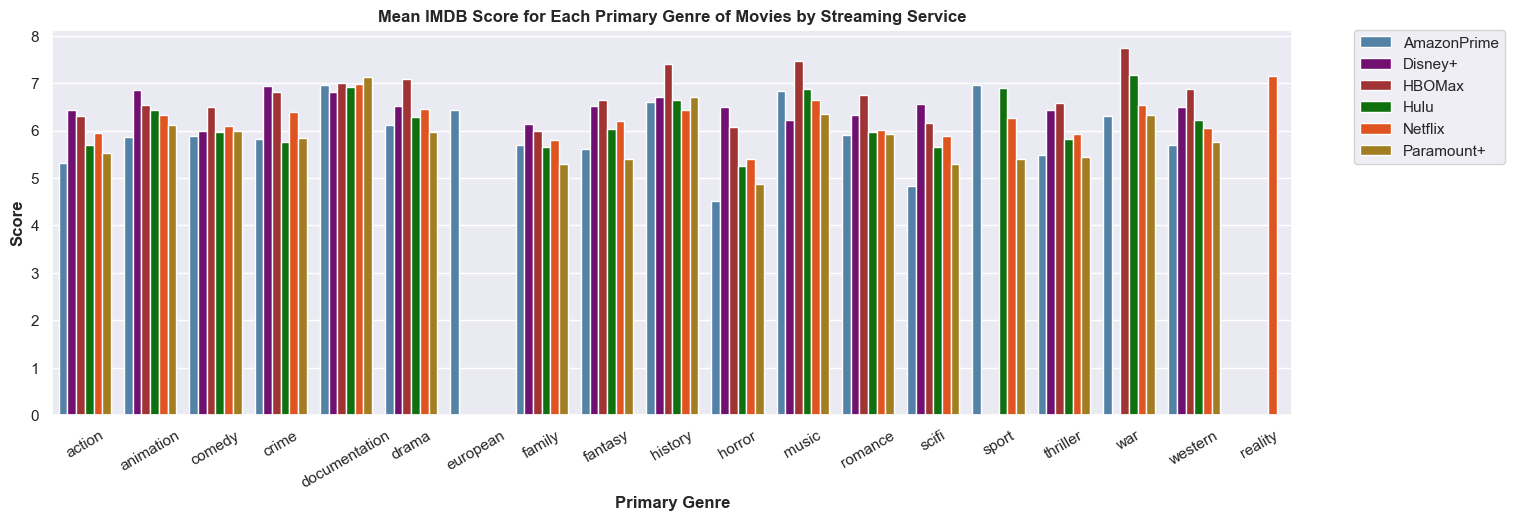

In [551]:
#Setting the plot space to be wider
plt.figure(figsize = (16, 5))
#Creating the side by side bar plot of mean IMDB scores for the movies separated by genre and service
ax = sns.barplot(x = "genre_0", y = "imdb_score", hue = "service", data = movie_genre_scores_by_service,
                palette = ["steelblue", "purple", "firebrick", "green", "orangered", "darkgoldenrod"]);
#Setting the legend to be outside the plot space so it doesn't cover up any of the bars
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

#Setting the title and axes labels and options so the plot is clear to read
ax.set_title("Mean IMDB Score for Each Primary Genre of Movies by Streaming Service", fontdict= {'fontweight':'bold'});
ax.set_xlabel("Primary Genre", fontdict= {'fontweight':'bold'});
ax.set_ylabel("Score", fontdict= {'fontweight':'bold'});
ax.set_xticklabels(["action", "animation", "comedy", "crime", "documentation", "drama", 
                    "european", "family", "fantasy", "history", "horror", "music", "romance", 
                    "scifi", "sport", "thriller", "war", "western", "reality"], rotation = 30);

Now, the reader is able to see what streaming service has the highest rated movies in each genre. Disney+ actually has the highest rated action, animated, crime, family, and sci-fi movies. HBOMax also scores the highest in several genres including comedy, drama, and history. Amazon Prime scores particuarly poorly in horror and sci-fi movies compared to the rest of the services. 

The following side-by-side bar plot shows the same information for the TV shows in the data set.

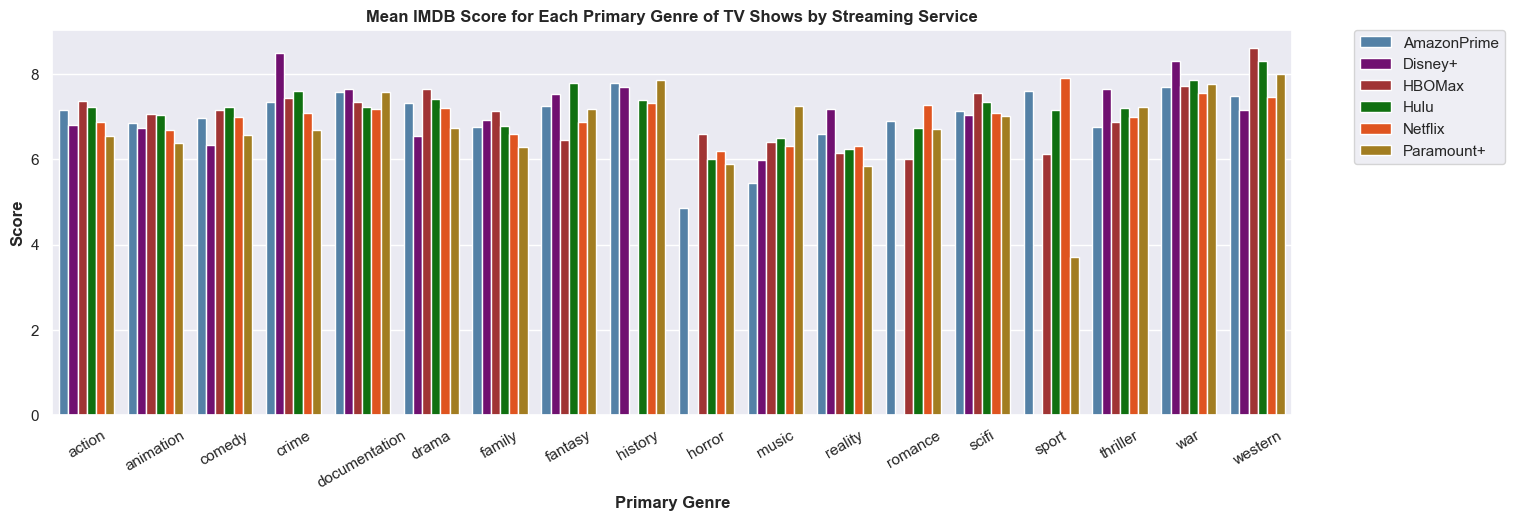

In [550]:
#Setting the plot space to be wider
plt.figure(figsize = (16, 5))
#Creating the side by side bar plot of mean IMDB scores for the TV shows separated by genre and service
ax = sns.barplot(x = "genre_0", y = "imdb_score", hue = "service", data = show_genre_scores_by_service,
                palette = ["steelblue", "purple", "firebrick", "green", "orangered", "darkgoldenrod"]);
#Setting the legend to be outside the plot space so it doesn't cover up any of the bars
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

#Setting the title and axes labels and options so the plot is clear to read
ax.set_title("Mean IMDB Score for Each Primary Genre of TV Shows by Streaming Service", fontdict= {'fontweight':'bold'});
ax.set_xlabel("Primary Genre", fontdict= {'fontweight':'bold'});
ax.set_ylabel("Score", fontdict= {'fontweight':'bold'});
ax.set_xticklabels(["action", "animation", "comedy", "crime", "documentation", "drama", 
                    "family", "fantasy", "history", "horror", "music", "reality", "romance", 
                    "scifi", "sport", "thriller", "war", "western"], rotation = 30);

Once again, Disney+ scores very highly in many genres, but this time Paramount+ has the best rated TV shows in the history and music genres. Netflix has the highest rated romance and sport shows. Many of the mean genre scores are fairly even across streaming services, like for animation, sci-fi, and documentation.

The data will be reorganized one more time in terms of primary genre. This will allow for the creation of a heatmap that some readers may prefer when comparing the mean genre scores across the different streaming services.

In [552]:
#Creating a data frame containing the service, type, primary genre, and IMDB score for each title
primary_genre_df = pd.DataFrame(df_all_genres[["service", "type", "genre_0", "imdb_score"]])
#Dropping any rows with a missing primary genre
primary_genre_df.drop(primary_genre_df[primary_genre_df["genre_0"] == ""].index, inplace = True)

The data is again separated by whether the titles are TV shows or movies and then pivot tables are created from those separate data frames. These pivot tables are used to aggregate the data and then visualize it using heatmaps.

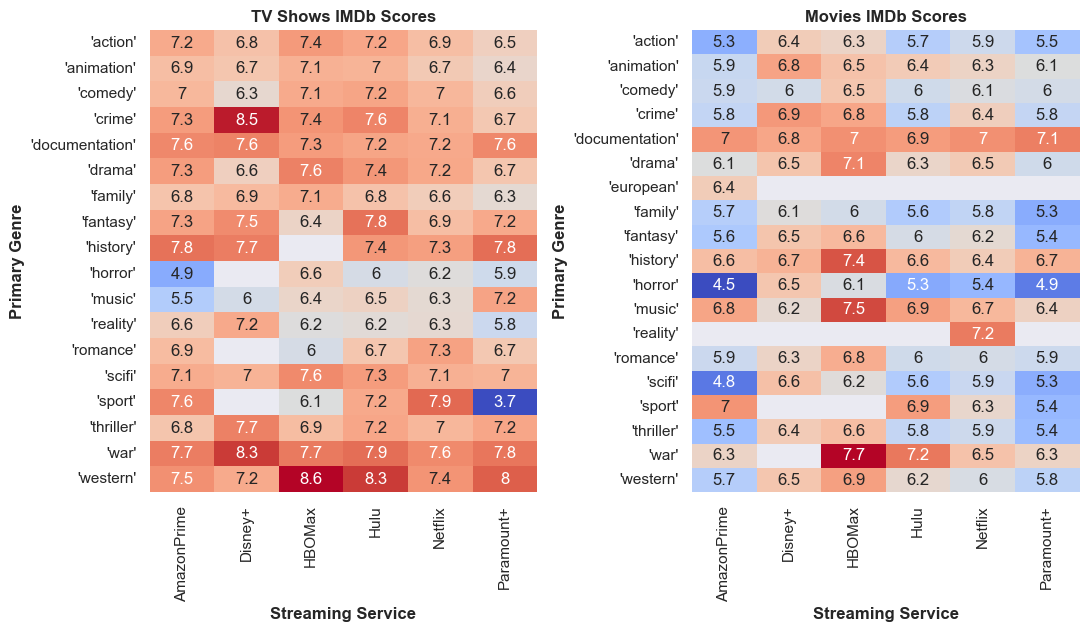

In [556]:
#Separating the data frame into two based on whether the titles are TV shows or movies
primary_genre_shows = primary_genre_df[primary_genre_df["type"] == "SHOW"]
primary_genre_movies = primary_genre_df[primary_genre_df["type"] == "MOVIE"]

# Create pivot table and heatmap for shows
table_shows = pd.pivot_table(primary_genre_shows, 
                       values='imdb_score', 
                       index=['genre_0'], 
                       columns=['service'], 
                       aggfunc='mean')

# Create pivot table and heatmap for movies
table_movies = pd.pivot_table(primary_genre_movies, 
                       values='imdb_score', 
                       index=['genre_0'], 
                       columns=['service'], 
                       aggfunc='mean')

# Create subplots and plot each heatmap in a separate subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'wspace': 0.4})
sns.heatmap(table_shows, annot=True, cmap='coolwarm', cbar=False, ax=ax1)
sns.heatmap(table_movies, annot=True, cmap='coolwarm', cbar=False, ax=ax2)
#Setting the axes labels and the titles
ax1.set_title('TV Shows IMDb Scores', fontdict= {'fontweight':'bold'})
ax2.set_title('Movies IMDb Scores', fontdict= {'fontweight':'bold'})
ax1.set_xlabel("Streaming Service", fontdict= {'fontweight':'bold'})
ax2.set_xlabel("Streaming Service", fontdict= {'fontweight':'bold'})
ax1.set_ylabel("Primary Genre", fontdict= {'fontweight':'bold'})
ax2.set_ylabel("Primary Genre", fontdict= {'fontweight':'bold'})
plt.show()

In the heatmaps, darker red colors represent higher average scores and darker blue colors represent lower average scores. The white spaces without numbers indicate that the streaming service does not have titles in that particular genre. Looking at the heatmaps across each row allows the reader to determine which streaming service has the highest average score in that particular genre. Looking at them along each column allows the reader to see what is the highest and lowest rated genres on each service.

Western TV shows on HBOMax have the highest average IMDB score overall, while sports TV shows on Paramount+ have the lowest. The highest rated movies on average are war movies on HBOMax, while the lowest are horror movies on Amazon Prime. 

It should also be noted that this visualization reveals that, overall, TV shows have higher average ratings than movies do for these streaming services.

### 3. Which services are improving or declining over time?

To answer this question, the changes in the services based on the release dates of programs will be analyzed. The amount of improvement or decline will be measured by changes in the ratings of the programs, the amount of content being released, and the variety of content available.

#### Amount of New Content Being Added Each Year

If someone is signing up for a subscription service, it is important to be confident that the service is growing and being updated. If nothing new is being released, then one might quickly get bored of what content is available after they've watched what they initially signed up to watch.

Starting at the year each service was founded, the number of movies and shows will be counted by release year. Since these programs were released after the streaming service began, the service shows a metric of growth by acquiring that much new content. It is also important to note that this data was pulled in the middle of 2022, so those numbers will be representative of how much content each service added in the first half of that year.

Paramount+ is the youngest of the streaming services, starting in 2021. It has not had much time to show real trends of growth or decline, but it is still important to see if the amount of new content on the platform is similar or not to the other major streaming services.

In [135]:
#Printing the number of titles with release years starting at the beginning year of the streaming service
print(df_all[(df_all["service"] == "Paramount+") & (df_all["release_year"] > 2020)].groupby("release_year")["title"].count())


release_year
2021    96
2022    20
Name: title, dtype: int64


Since Paramount+ is brand new there is not much to compare in this data. The good news is that the service is expanding in its second year since newer titles are being released for the service.

HBOMax is the next youngest, starting in 2020, however, this service evolved from HBO Now and HBO Go which were both previously available for a number of years.

In [136]:
#Printing the number of titles with release years starting at the beginning year of the streaming service
print(df_all[(df_all["service"] == "HBOMax") & (df_all["release_year"] > 2019)].groupby("release_year")["title"].count())


release_year
2020    255
2021    258
2022     62
Name: title, dtype: int64


HBOMax has added a significant amount of new titles being released each year. It will be interesting to see if the total number added from 2022 can keep pace with the previous two years of releases. Subscribers should be confident that HBOMax will have lots of new content though.

Disney+ launched in 2019. It has had a few years to show growth, but this streaming service is probably the most specific of these six as they are strictly focusing on content created by only a select number of studios.

In [137]:
#Printing the number of titles with release years starting at the beginning year of the streaming service
print(df_all[(df_all["service"] == "Disney+") & (df_all["release_year"] > 2018)].groupby("release_year")["title"].count())


release_year
2019     96
2020    126
2021    136
2022     35
Name: title, dtype: int64


Even with a reduced pool of content to draw from, a good number of newly released titles have been added on to the service. Disney seems to be fully committing to expanding their streaming service.

Hulu launched in 2007, the youngest of the three much older streaming services. This has been a very popular streaming option for a number of years, so it will be interested to see how the greater levels of compartmentalization with a growing number of streaming platforms has affected their ability to get newly released content on the platform.

In [138]:
#Printing the number of titles with release years starting at the beginning year of the streaming service
print(df_all[(df_all["service"] == "Hulu") & (df_all["release_year"] > 2006)].groupby("release_year")["title"].count())


release_year
2007     49
2008     42
2009     62
2010     66
2011     69
2012     88
2013    104
2014    122
2015    123
2016    136
2017    154
2018    167
2019    292
2020    265
2021    224
2022     46
Name: title, dtype: int64


Hulu appears to be doing a great job of adding newly released content. Hulu is matching the number of newly released titles being added on HBOMax. There does not seem to be any risk of Hulu slowing down in the coming years.

Surprisingly, Netflix, the one that started it all, is not the oldest streaming service. Although they launched all the way back in 1997, it was originally just a DVD mailing service. They did not transition to on-demand streaming until 2007.

In [139]:
#Printing the number of titles with release years starting at the beginning year of the streaming service
print(df_all[(df_all["service"] == "Netflix") & (df_all["release_year"] > 2006)].groupby("release_year")["title"].count())


release_year
2007     48
2008     63
2009     59
2010     66
2011     86
2012    107
2013    135
2014    153
2015    222
2016    362
2017    563
2018    773
2019    836
2020    814
2021    787
2022    371
Name: title, dtype: int64


Netflix has been adding a massive amount of newly released content to their available library. With so many shows and movies, and many of them being developed directly by Netflix, it will be interesting to see if they are beginning to sacrifice quality in favor of quantity.

Amazon Prime Video has actually been around the longest, launching in 2006. The service was originally named Amazon Unbox and then renamed to Amazon Video on Demand in 2008, before settling on the Amazon Prime Video name in 2016.

In [134]:
#Printing the number of titles with release years starting at the beginning year of the streaming service
print(df_all[(df_all["service"] == "AmazonPrime") & (df_all["release_year"] > 2005)].groupby("release_year")["title"].count())


release_year
2006    129
2007    135
2008    176
2009    160
2010    185
2011    211
2012    264
2013    345
2014    369
2015    371
2016    497
2017    581
2018    685
2019    807
2020    698
2021    856
2022     89
Name: title, dtype: int64


Amazon Prime has also been adding tons of newly released content to their platform as well. It appears that Amazon has access to the greatest number of networks and studios and may be expanding the number of titles they are developing as well. 

#### Changes in Ratings Over Time

Each streaming service will be looked at separately and the programs will be grouped by whether they are shows or movies for each year they were released. The mean imdb scores of the programs released each year are plotted over time. While these streaming services obviously did not exist 50 or more years ago, this allows the recent content they have licensed to be on their platform to be compared to older movies and shows. Focusing on the direction of the rightmost part of the plot compared to any previous trends will reveal if the service has started to decline, improve, or is holding steady.

A new data frame is created where the movies and shows are grouped by the streaming service they are on, whether they are a movie or a show, and then by their release year. The mean IMDB and TMDB scores are calculated for each group while any missing values are ignored.

In [247]:
#Aggregating the data to get the scores over time
scores_over_time_by_type = df_all.groupby(["service", "type", "release_year"])[["imdb_score", "tmdb_score"]].agg(np.nanmean).reset_index()

#Displaying the data frame
scores_over_time_by_type

,service,type,release_year,imdb_score,tmdb_score
0,AmazonPrime,MOVIE,1912,5.800000,5.300000
1,AmazonPrime,MOVIE,1914,5.600000,4.850000
2,AmazonPrime,MOVIE,1915,6.140000,5.900000
3,AmazonPrime,MOVIE,1916,7.050000,6.450000
4,AmazonPrime,MOVIE,1917,6.300000,9.000000
...,...,...,...,...,...
821,Paramount+,SHOW,2018,6.666667,7.590000
822,Paramount+,SHOW,2019,6.915909,7.900000
823,Paramount+,SHOW,2020,6.125000,7.566667
824,Paramount+,SHOW,2021,6.303571,7.462500


The rows of data for Amazon Prime are isolated and the mean IMDB scores are plotted over time. To be consistent from service to service, the y-axis will span the entire range of possible scores from 0 to 10, and the x-axis will span from 1900 to present. This will also show how old the oldest content available on each service is.

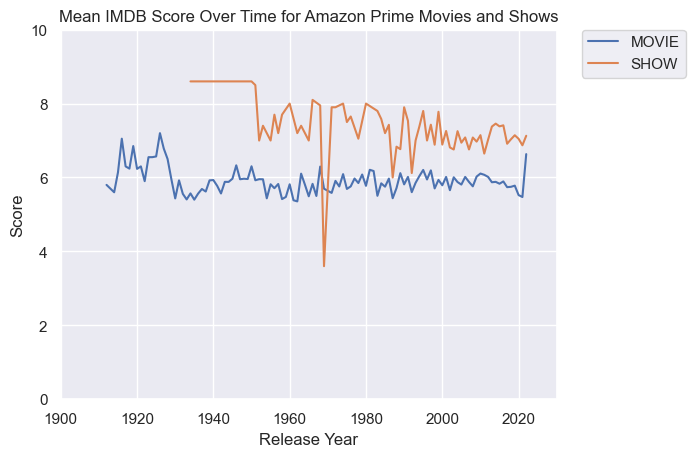

In [248]:
#Creating a data frame of just the scores over time data for Amazon Prime
over_time_prime = scores_over_time_by_type.loc[scores_over_time_by_type["service"] == "AmazonPrime"].reset_index(drop = True)

#Creating a line plot of the mean IMDB scores for titles based on release year
ax = sns.lineplot(x = "release_year", y = "imdb_score", hue = "type", data = over_time_prime);

#Setting the plot limits to be the same for all the line plots
ax.set_ylim((0, 10));
ax.set_xlim((1900, 2030));

#Setting the title and axes labels
ax.set(title = "Mean IMDB Score Over Time for Amazon Prime Movies and Shows", xlabel = "Release Year", ylabel = "Score");

#Placing the legend outside the plot space
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);




The mean IMDB scores for movies and shows on Amazon Prime are pretty steady from release year to release year. There is a bit more fluctuation in the mean scores for the shows compared to the movies. Most importantly, however, both the shows and the movies are trending upwards at the very end. This means the new content that Amazon is adding to Prime is starting to review better. Also, their available content goes pretty far back with the oldest movie released around 1910 and the oldest show released in the 1930s.

The line plot for Disney+ is shown next.

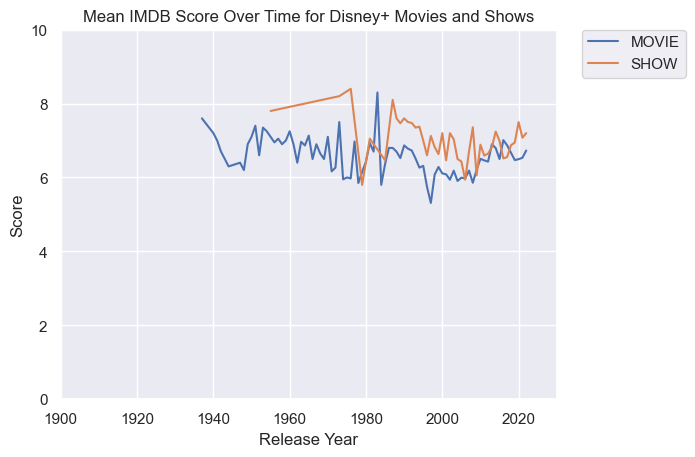

In [568]:
#Creating a data frame of just the scores over time for Disney+
over_time_disney = scores_over_time_by_type.loc[scores_over_time_by_type["service"] == "Disney+"].reset_index(drop = True)

#Creating a line plot of the mean IMDB scores for titles by release year
ax = sns.lineplot(x = "release_year", y = "imdb_score", hue = "type", data = over_time_disney);

#Setting the plot limits to be the same for all the line plots
ax.set_ylim((0, 10));
ax.set_xlim((1900, 2030));

#Setting the title and axes labels
ax.set(title = "Mean IMDB Score Over Time for Disney+ Movies and Shows", xlabel = "Release Year", ylabel = "Score");

#Placing the legend outside the plot space
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);


The mean movie and TV show scores, for the most part, stay within the 6 to 8 range across all the release years. Disney does not have as old as content as Amazon, with its oldest movie releasing in the 1930s and its oldest show releasing in the 1950s. Both movies and shows are showing an upward trend after 2020, but those are both occurring after some dips downward. It is unclear whether Disney has positive momentum or are actually stagnating as they release new content.

The line plot for HBOMax is shown next.

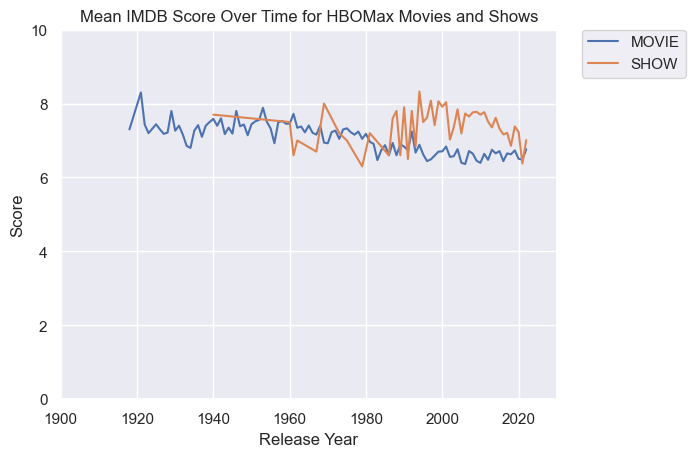

In [250]:
#Creating a data frame of just the scores over time for HBOMax
over_time_hbo = scores_over_time_by_type.loc[scores_over_time_by_type["service"] == "HBOMax"].reset_index(drop = True)

#Creating the line plot of the mean IMDB scores by release year
ax = sns.lineplot(x = "release_year", y = "imdb_score", hue = "type", data = over_time_hbo);

#Setting the plot limits so they are the same for all the line plots
ax.set_ylim((0, 10));
ax.set_xlim((1900, 2030));

#Setting the title and axes labels
ax.set(title = "Mean IMDB Score Over Time for HBOMax Movies and Shows", xlabel = "Release Year", ylabel = "Score");

#Moving the legend outside the plot space
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

HBOMax features movies dating back before 1920 and TV shows starting at 1940. Their shows appear to be more highly rated than their movies over the last 30 to 40 years. The very end of the graph shows spikes upwards for both their movies and shows, although there is a bit of a drop in mean scores by release year for TV shows in the years leading up to that spike.

The following line plot shows the mean scores by release year for Hulu.

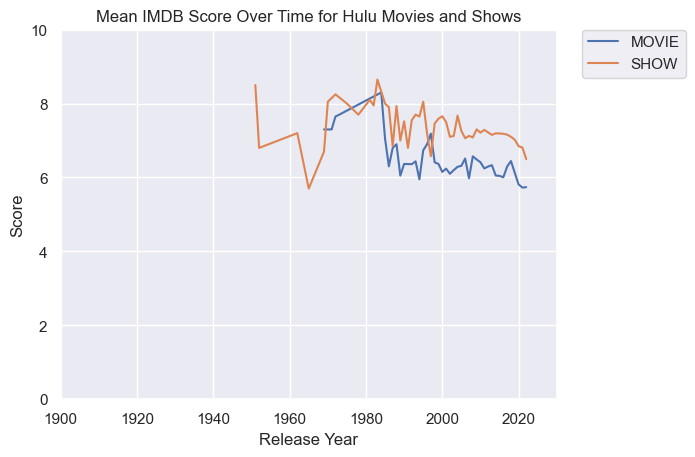

In [117]:
#Ceating a data frame of just the scores over time for Hulu
over_time_hulu = scores_over_time_by_type.loc[scores_over_time_by_type["service"] == "Hulu"].reset_index(drop = True)

#Creating the line plot of the mean IMDB scores by release year
ax = sns.lineplot(x = "release_year", y = "imdb_score", hue = "type", data = over_time_hulu);

#Setting the plot limits to be the same for all the line plots
ax.set_ylim((0, 10));
ax.set_xlim((1900, 2030));

#Setting the title and axes labels
ax.set(title = "Mean IMDB Score Over Time for Hulu Movies and Shows", xlabel = "Release Year", ylabel = "Score");

#Moving the legend outside the plot space
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);



Hulu features a lot less older content when compared to the other streaming services. Their oldest shows are from around 1950 while their movies only date back to approximately 1970. This could be viewed as a significant drawback. Also, their mean IMDB scores by release year have been showing a decline over the last decade or so. This could be an indication that Hulu is struggling to provide new content at the same quality level as the older content on the service.

The next line plot shows the mean IMDB scores by release year for Netflix.

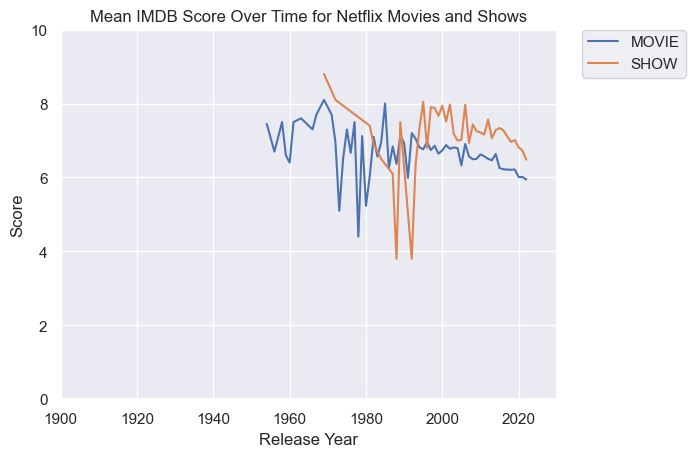

In [118]:
#Creating a data frame of just the scores over time for Netflix
over_time_netflix = scores_over_time_by_type.loc[scores_over_time_by_type["service"] == "Netflix"].reset_index(drop = True)

#Creating a line plot of the meand IMDB scores by release year
ax = sns.lineplot(x = "release_year", y = "imdb_score", hue = "type", data = over_time_netflix);

#Setting the plot limits so they are the same for all the line plots
ax.set_ylim((0, 10));
ax.set_xlim((1900, 2030));

#Setting the title and axes labels
ax.set(title = "Mean IMDB Score Over Time for Netflix Movies and Shows", xlabel = "Release Year", ylabel = "Score");

#Moving the legend outside the plot space
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);


It is immediately obvious that Netflix has the least amount of older content compared to the other services. Their oldest movie was released in the 1950s, while their oldest show was released around 1970. This may indicate a trend of Netflix removing or not being willing to add older content to their service, while only adding newer content. Unfortunately for them, this newer content is not reviewing as favorably as older programs. The review scores of both movies and shows have been trending downward for more than the last decade. This may indicate that Netflix is on a decline and users are not as happy with what is being released on the service as they used to be.

The final line plot visualizes the data for Paramount+.

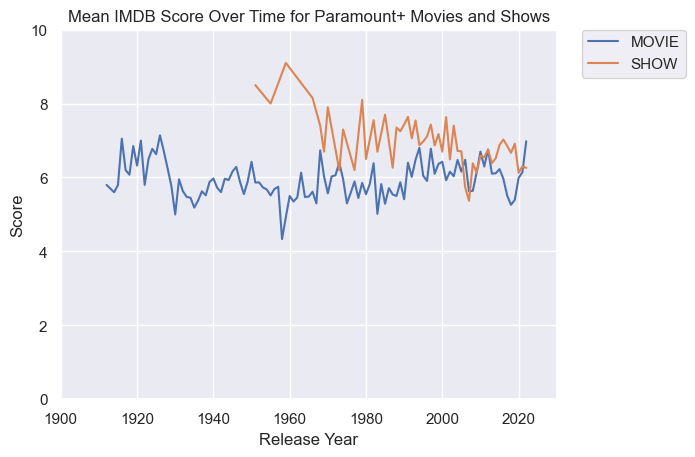

In [251]:
#Creating a data frame of just the scores over time for Paramount+
over_time_paramount = scores_over_time_by_type.loc[scores_over_time_by_type["service"] == "Paramount+"].reset_index(drop = True)

#Creating a line plot of the mean IMDB scores by release year
ax = sns.lineplot(x = "release_year", y = "imdb_score", hue = "type", data = over_time_paramount);

#Setting the plot limits to be the same for all the line plots
ax.set_ylim((0, 10));
ax.set_xlim((1900, 2030));

#Setting the title and axes labels
ax.set(title = "Mean IMDB Score Over Time for Paramount+ Movies and Shows", xlabel = "Release Year", ylabel = "Score");

#Moving the legend outside the plot space
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);


Despite being the youngest service, Paramount+ has movies dating back to about 1910 and TV shows dating back to about 1950. The mean scores by release year for movies tend to fluctuate around a score of 6, with a bit of an upward spike appearing for those titles released in the last few years. TV shows on the other hand are not showing that kind of growth for the most recent titles. It is difficult to say whether Paramount+ is growing or not since it so new, but subscribers can be assured that the quality of their content is similar to the other services in terms of mean scores.

#### Comparing the Mean IMDB Scores by Release Year for All Content on Each Service

To better focus on any trends of growth or decline in the scores of titles by release year, a 10 year rolling average of the mean IMDB scores across all titles on each service will be overlaid on top of the line plot of the mean IMDB scores by release year. This should give the viewer a clear picture on the quality of the content on each service that has been released over the most recent decade.

In [569]:
#Creating separate data frames for each streaming service that include a 10 year rolling average of the mean
#IMDB scores by release year

over_time_scores = df_all.groupby(["service", "release_year"])[["imdb_score", "tmdb_score"]].agg(np.nanmean).reset_index()

over_time_scores = over_time_scores.rename(columns = {"imdb_score": "mean_imdb_score", "tmdb_score": "mean_tmdb_score"})

over_time_scores["mean_imdb_score"] = over_time_scores["mean_imdb_score"].round(2)
over_time_scores["mean_tmdb_score"] = over_time_scores["mean_tmdb_score"].round(2)

over_time_scores_prime = over_time_scores.loc[over_time_scores["service"] == "AmazonPrime"].reset_index()

over_time_scores_prime["IMDB_10year_AVG"] = over_time_scores_prime["mean_imdb_score"].rolling(10, min_periods=1).agg(np.nanmean)
over_time_scores_prime["IMDB_10year_AVG"] = over_time_scores_prime["IMDB_10year_AVG"].round(2)

over_time_scores_disney = over_time_scores.loc[over_time_scores["service"] == "Disney+"].reset_index(drop = True)

over_time_scores_disney["IMDB_10year_AVG"] = over_time_scores_disney["mean_imdb_score"].rolling(10, min_periods=1).agg(np.nanmean)
over_time_scores_disney["IMDB_10year_AVG"] = over_time_scores_disney["IMDB_10year_AVG"].round(2)

over_time_scores_hbo = over_time_scores.loc[over_time_scores["service"] == "HBOMax"].reset_index(drop = True)

over_time_scores_hbo["IMDB_10year_AVG"] = over_time_scores_hbo["mean_imdb_score"].rolling(10, min_periods=1).agg(np.nanmean)
over_time_scores_hbo["IMDB_10year_AVG"] = over_time_scores_hbo["IMDB_10year_AVG"].round(2)

over_time_scores_hulu = over_time_scores.loc[over_time_scores["service"] == "Hulu"].reset_index(drop = True)

over_time_scores_hulu["IMDB_10year_AVG"] = over_time_scores_hulu["mean_imdb_score"].rolling(10, min_periods=1).agg(np.nanmean)
over_time_scores_hulu["IMDB_10year_AVG"] = over_time_scores_hulu["IMDB_10year_AVG"].round(2)

over_time_scores_netflix = over_time_scores.loc[over_time_scores["service"] == "Netflix"].reset_index(drop = True)

over_time_scores_netflix["IMDB_10year_AVG"] = over_time_scores_netflix["mean_imdb_score"].rolling(10, min_periods=1).agg(np.nanmean)
over_time_scores_netflix["IMDB_10year_AVG"] = over_time_scores_netflix["IMDB_10year_AVG"].round(2)

over_time_scores_paramount = over_time_scores.loc[over_time_scores["service"] == "Paramount+"].reset_index(drop = True)

over_time_scores_paramount["IMDB_10year_AVG"] = over_time_scores_paramount["mean_imdb_score"].rolling(10, min_periods=1).agg(np.nanmean)
over_time_scores_paramount["IMDB_10year_AVG"] = over_time_scores_paramount["IMDB_10year_AVG"].round(2)



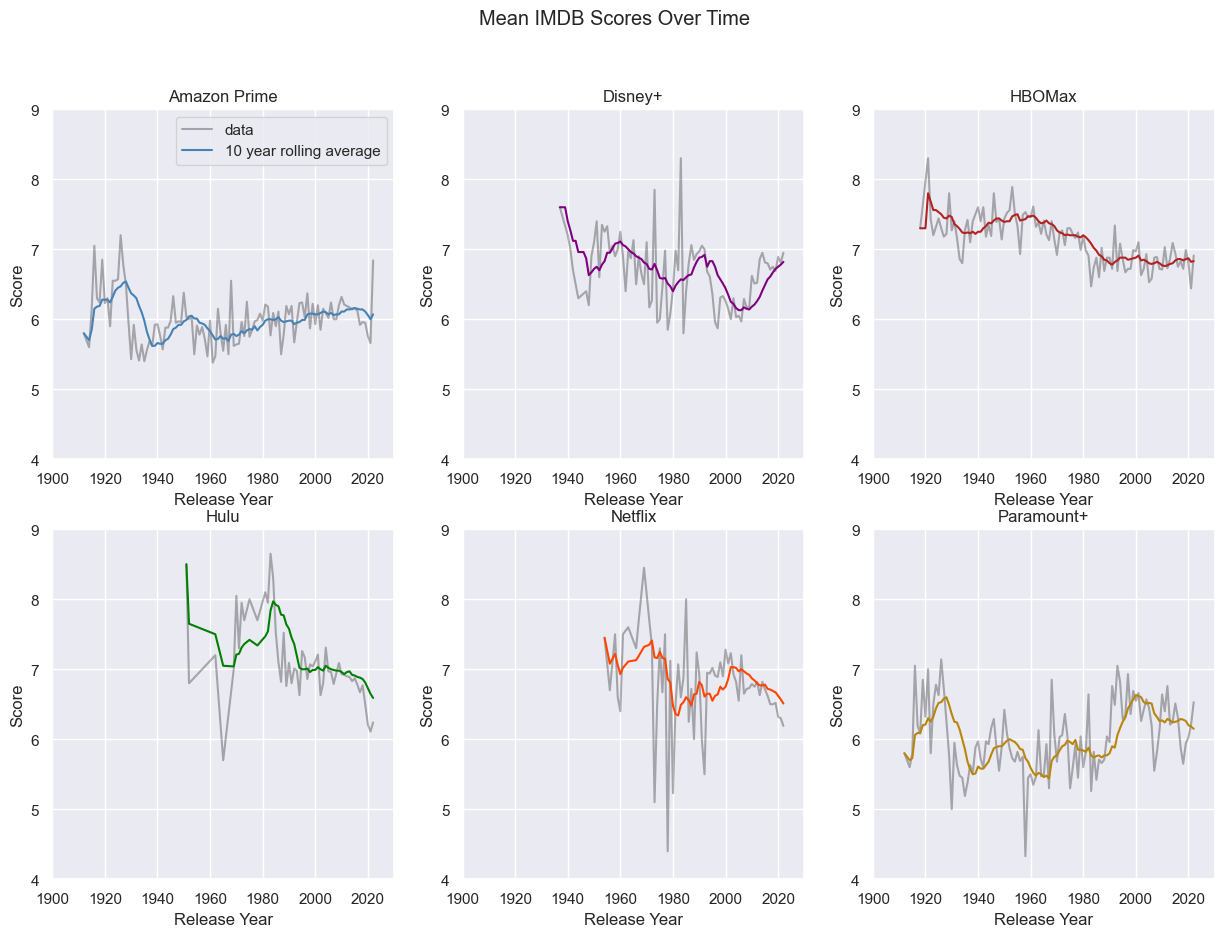

In [572]:
#Expanding the plot space and setting it to create 2 rows of 3 plots each
fig, axes = plt.subplots(2, 3, figsize=(15,10));
#Creating a title for the entire matrix of plots
fig.suptitle("Mean IMDB Scores Over Time");

#Amazon Prime plot with score data in background and 10 year rolling average in foreground
ax = sns.lineplot(ax = axes[0, 0], x = "release_year", y = "mean_imdb_score", errorbar = None, color = "black",
                  alpha = 0.3, data = over_time_scores_prime);
ax1 = sns.lineplot(ax = axes[0,0], x = "release_year", y = "IMDB_10year_AVG", errorbar = None, color = "steelblue",
                  data = over_time_scores_prime);
axes[0,0].set(title = "Amazon Prime", xlabel = "Release Year", ylabel = "Score");
axes[0,0].set_xlim(1900,2030);
axes[0,0].set_ylim(4,9);
axes[0,0].legend(labels = ["data", "10 year rolling average"]);

#Disney+ plot with score data in background and 10 year rolling average in foreground
ax = sns.lineplot(ax = axes[0, 1], x = "release_year", y = "mean_imdb_score", errorbar = None, color = "black",
                  alpha = 0.3, data = over_time_scores_disney);
ax1 = sns.lineplot(ax = axes[0,1], x = "release_year", y = "IMDB_10year_AVG", errorbar = None, color = "purple",
                  data = over_time_scores_disney);
axes[0,1].set(title = "Disney+", xlabel = "Release Year", ylabel = "Score");
axes[0,1].set_xlim(1900,2030);
axes[0,1].set_ylim(4,9);

#HBOMax plot with score data in background and 10 year rolling average in foreground
ax = sns.lineplot(ax = axes[0, 2], x = "release_year", y = "mean_imdb_score", errorbar = None, color = "black",
                  alpha = 0.3, data = over_time_scores_hbo);
ax1 = sns.lineplot(ax = axes[0,2], x = "release_year", y = "IMDB_10year_AVG", errorbar = None, color = "firebrick",
                  data = over_time_scores_hbo);
axes[0,2].set(title = "HBOMax", xlabel = "Release Year", ylabel = "Score");
axes[0,2].set_xlim(1900,2030);
axes[0,2].set_ylim(4,9);

#Hulu plot with score data in background and 10 year rolling average in foreground
ax = sns.lineplot(ax = axes[1, 0], x = "release_year", y = "mean_imdb_score", errorbar = None, color = "black",
                  alpha = 0.3, data = over_time_scores_hulu);
ax1 = sns.lineplot(ax = axes[1,0], x = "release_year", y = "IMDB_10year_AVG", errorbar = None, color = "green",
                  data = over_time_scores_hulu);
axes[1,0].set(title = "Hulu", xlabel = "Release Year", ylabel = "Score");
axes[1,0].set_xlim(1900,2030);
axes[1,0].set_ylim(4,9);

#Netflix plot with score data in background and 10 year rolling average in foreground
ax = sns.lineplot(ax = axes[1, 1], x = "release_year", y = "mean_imdb_score", errorbar = None, color = "black",
                  alpha = 0.3, data = over_time_scores_netflix);
ax1 = sns.lineplot(ax = axes[1,1], x = "release_year", y = "IMDB_10year_AVG", errorbar = None, color = "orangered",
                  data = over_time_scores_netflix);
axes[1,1].set(title = "Netflix", xlabel = "Release Year", ylabel = "Score");
axes[1,1].set_xlim(1900,2030);
axes[1,1].set_ylim(4,9);

#Paramount+ plot with score data in background and 10 year rolling average in foreground
ax = sns.lineplot(ax = axes[1, 2], x = "release_year", y = "mean_imdb_score", errorbar = None, color = "black",
                  alpha = 0.3, data = over_time_scores_paramount);
ax1 = sns.lineplot(ax = axes[1,2], x = "release_year", y = "IMDB_10year_AVG", errorbar = None, color = "darkgoldenrod",
                  data = over_time_scores_paramount);
axes[1,2].set(title = "Paramount+", xlabel = "Release Year", ylabel = "Score");
axes[1,2].set_xlim(1900,2030);
axes[1,2].set_ylim(4,9);


Disney+ is the only service whose 10 year rolling average is showing an increase in scores for those titles released in the last several years, and this is after a period of decline. Amazon Prime and HBOMax are holding steady with mean IMDB scores close to a 7 and 6 respectively. Hulu and Netflix are currently in periods of declining scores among their most recently released content. Both of their rolling averages have descended to between a 6 and 7. Lastly, Paramount+ is showing a bit of decline in the ratings of its most recently released titles, but since the service is so new, it might be better to give the service a few more years to see how their upcoming titles perform with audiences.

### 4. Is a program's score on IMDB related to the number of votes it receives?

This question will examine the relationship between the IMDB scores and the number of votes to determine that score. Are the scores of titles that receive a lot of votes artificially inflated just because of their popularity or will a vast number of votes tend to drag the score down because there will be more unhappy viewers voting as well?

For this question, the first step was to determine if there was any correlation at all between the IMDB scores and the ratings given to the shows/movies on the different platforms.

In [579]:
#Creating a data frame containing just the relevant variables
scoresandvotesDF = pd.DataFrame(df_all[['service', 'imdb_score', 'imdb_votes']])
#Dropping any rows with missing values since all valid values are required for all the variables in this analysis
scoresandvotesDF.dropna(axis = 0, inplace = True)
#Checking to make sure there are no missing values
scoresandvotesDF.isna().sum()

service       0
imdb_score    0
imdb_votes    0
dtype: int64

The scores and votes data frame is then separated into six data frames based on the streaming service so each service can be analyzed individually as well.

In [580]:
#Separating the data frame into 6 data frames based on streaming service
scoresandvotesDF_hulu = scoresandvotesDF[scoresandvotesDF['service'] == 'Hulu']
scoresandvotesDF_amazon = scoresandvotesDF[scoresandvotesDF['service'] == 'AmazonPrime']
scoresandvotesDF_disney = scoresandvotesDF[scoresandvotesDF['service'] == 'Disney+']
scoresandvotesDF_hbo = scoresandvotesDF[scoresandvotesDF['service'] == 'HBOMax']
scoresandvotesDF_netflix = scoresandvotesDF[scoresandvotesDF['service'] == 'Netflix']
scoresandvotesDF_paramount = scoresandvotesDF[scoresandvotesDF['service'] == 'Paramount+']

Using the data frame containing the titles on all the streaming services, a simple regression model was created to determine the rate of contribution that scores had on votes.

In [581]:
# regression table for votes and scores
X = scoresandvotesDF['imdb_votes']
y = scoresandvotesDF['imdb_score']

model = sm.OLS(y, sm.add_constant(X)).fit()

# Create regression table
reg_table = model.summary().tables[1]
reg_table

,coef,std err,t,P>|t|,[0.025,0.975]
const,6.2569,0.009,734.780,0.000,6.240,6.274
imdb_votes,2.543e-06,7.86e-08,32.347,0.000,2.39e-06,2.7e-06


The regression model reveals that increasing the IMDB votes count by 1 increases the IMDB score by 0.000002543. This means that the number of votes has close to no impact on the score the title receives.

Next, the regression model wil be run on the individual scores and votes data frames for each streaming service.

In [582]:
# regression table for votes and scores
X = scoresandvotesDF_amazon['imdb_votes']
y = scoresandvotesDF_amazon['imdb_score']

model = sm.OLS(y, sm.add_constant(X)).fit()

# Create regression table
reg_table = model.summary().tables[1]
reg_table

,coef,std err,t,P>|t|,[0.025,0.975]
const,5.9351,0.014,414.223,0.000,5.907,5.963
imdb_votes,4.852e-06,3.07e-07,15.815,0.000,4.25e-06,5.45e-06


In [493]:
# regression table for votes and scores
X = scoresandvotesDF_disney['imdb_votes']
y = scoresandvotesDF_disney['imdb_score']

model = sm.OLS(y, sm.add_constant(X)).fit()

# Create regression table
reg_table = model.summary().tables[1]
reg_table

,coef,std err,t,P>|t|,[0.025,0.975]
const,6.4755,0.033,195.400,0.000,6.410,6.540
imdb_votes,1.662e-06,1.63e-07,10.199,0.000,1.34e-06,1.98e-06


In [494]:
# regression table for votes and scores
X = scoresandvotesDF_hbo['imdb_votes']
y = scoresandvotesDF_hbo['imdb_score']

model = sm.OLS(y, sm.add_constant(X)).fit()

# Create regression table
reg_table = model.summary().tables[1]
reg_table

,coef,std err,t,P>|t|,[0.025,0.975]
const,6.8012,0.020,332.237,0.000,6.761,6.841
imdb_votes,1.261e-06,1.09e-07,11.512,0.000,1.05e-06,1.48e-06


In [495]:
# regression table for votes and scores
X = scoresandvotesDF_hulu['imdb_votes']
y = scoresandvotesDF_hulu['imdb_score']

model = sm.OLS(y, sm.add_constant(X)).fit()

# Create regression table
reg_table = model.summary().tables[1]
reg_table

,coef,std err,t,P>|t|,[0.025,0.975]
const,6.6043,0.027,248.659,0.000,6.552,6.656
imdb_votes,3.376e-06,3.2e-07,10.546,0.000,2.75e-06,4e-06


In [496]:
# regression table for votes and scores
X = scoresandvotesDF_netflix['imdb_votes']
y = scoresandvotesDF_netflix['imdb_score']

model = sm.OLS(y, sm.add_constant(X)).fit()

# Create regression table
reg_table = model.summary().tables[1]
reg_table

,coef,std err,t,P>|t|,[0.025,0.975]
const,6.4563,0.016,401.401,0.000,6.425,6.488
imdb_votes,2.317e-06,1.63e-07,14.206,0.000,2e-06,2.64e-06


In [491]:
# regression table for votes and scores
X = scoresandvotesDF_paramount['imdb_votes']
y = scoresandvotesDF_paramount['imdb_score']

model = sm.OLS(y, sm.add_constant(X)).fit()

# Create regression table
reg_table = model.summary().tables[1]
reg_table

,coef,std err,t,P>|t|,[0.025,0.975]
const,5.9880,0.025,241.813,0.000,5.939,6.037
imdb_votes,2.469e-06,2.1e-07,11.757,0.000,2.06e-06,2.88e-06


The regression models created for each service tell the same story. The change in the number of votes accounts for close to none of the change in IMDB scores.

Next, the Pearson correlation coefficient between the two variables is calculated using each streaming service's data set. There does happen to be some correlation between the two variables, which is in some contrast to the previous results, although this does not mean that the number of votes is directly affecting the score in some way, as correlation does not equal causation.

In [497]:
#Calculating the correlation between votes and scores for the Amazon Prime titles
scoresandvotesDF_amazon.corr(method='pearson')

,imdb_score,imdb_votes
imdb_score,1.000000,0.165892
imdb_votes,0.165892,1.000000


In [498]:
#Calculating the correlation between votes and scores for the Disney+ titles
scoresandvotesDF_disney.corr(method='pearson')

,imdb_score,imdb_votes
imdb_score,1.000000,0.293552
imdb_votes,0.293552,1.000000


In [499]:
#Calculating the correlation between votes and scores for the HBO titles
scoresandvotesDF_hbo.corr(method='pearson')

,imdb_score,imdb_votes
imdb_score,1.000000,0.208739
imdb_votes,0.208739,1.000000


In [500]:
#Calculating the correlation between votes and scores for the Hulu titles
scoresandvotesDF_hulu.corr(method='pearson')

,imdb_score,imdb_votes
imdb_score,1.000000,0.217997
imdb_votes,0.217997,1.000000


In [501]:
#Calculating the correlation between votes and scores for the Netflix titles
scoresandvotesDF_netflix.corr(method='pearson')

,imdb_score,imdb_votes
imdb_score,1.000000,0.190661
imdb_votes,0.190661,1.000000


In [502]:
#Calculating the correlation between votes and scores for the Paramount+ titles
scoresandvotesDF_paramount.corr(method='pearson')

,imdb_score,imdb_votes
imdb_score,1.00000,0.22422
imdb_votes,0.22422,1.00000


The goal of the upcoming visualization is to showcase that the data for the correlation between scores and votes is very noisy and has no discernible pattern. Viewing the data in this light makes it no surprise that the previous correlations were low.

In [583]:
# Initialize a StandardScaler object 'scaler'
scaler = StandardScaler()

# Scale the 'imdb_score' and 'imdb_votes' columns in the 'df_all' dataframe using the 'fit_transform' method
scores_scaled, votes_scaled = scaler.fit_transform(df_all['imdb_score'].values.reshape(-1, 1)), scaler.fit_transform(df_all['imdb_votes'].values.reshape(-1, 1))

# Create a new dataframe 'scoresandvotes_scaledDF' from the scaled 'imdb_score' and 'imdb_votes' values
scoresandvotes_scaledDF = pd.DataFrame(scores_scaled.reshape(-1), votes_scaled.reshape(-1))

# Drop any rows with missing values in the 'scoresandvotes_scaledDF' dataframe
scoresandvotes_scaledDF.dropna(axis=0, inplace=True)

# Reset the index of the 'scoresandvotes_scaledDF' dataframe
scoresandvotes_scaledDF.reset_index(inplace=True)

# Compute the Pearson correlation coefficient between the columns in the 'scoresandvotes_scaledDF' dataframe
scoresandvotes_scaledDF.corr(method='pearson')

,index,0
index,1.000000,0.208378
0,0.208378,1.000000


The following plot reveals that there is not a high correlation between scores and number of votes until the titles that received very high overall scores. Around a score of 9, the correlation between the two variables very suddenly spikes upwards.

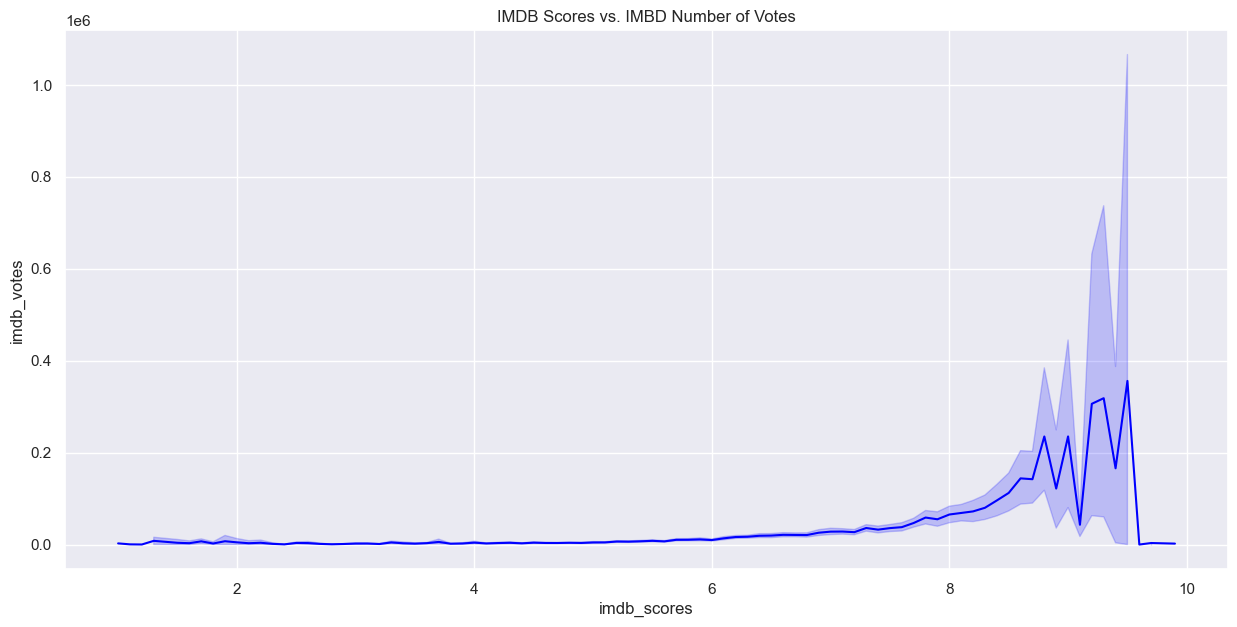

In [597]:
# Create a subplot with a specified figure size of 15 inches in width and 7 inches in height
fig = plt.subplots(figsize = (15, 7));

# Use the 'lineplot' function from the seaborn library to plot a line graph of the 'imdb_votes' column against an x-axis of increasing indices
sns.lineplot(scoresandvotesDF, x = scoresandvotesDF['imdb_score'], y = scoresandvotesDF['imdb_votes'], color='blue');

plt.title("IMDB Scores vs. IMBD Number of Votes");
plt.xlabel("imdb_scores");


Titles with low scores, less than a 6, received almost no votes. But, once the scores increase past 6, the number of votes starts to increase. This may be due to the fact that as a show begins to be more highly rated, it is more likely that someone else will also take action to vote for it. Maybe they would like to see this title pushed to the top of the ratings, or to the bottom, depending on how they feel about it. However, this does not explain why lower scores were associated with far less votes.

### 5. Can age certifications be determined using the show or movie descriptions or genres?

The final question of interest will investigate if the age certifications are consistent with their descriptions and genres. This should uncover the trustworthiness of the age certifications as they are applied across the wide variety of titles on the streaming services. This will let subscribers with children know the level of confidence they should have in trusting the age certifications as the measure of what they allow their children to watch.

First, the descriptions and their accompanying age certifications are isolated in their own data frame.

In [585]:
#Creating a data frame of just descriptions and age certifications
desc_agecertDF = pd.DataFrame(df_all[['description', 'age_certification']])
#Dropping any rows with missing values
desc_agecertDF.dropna(axis=0, inplace=True)
#Displaying the data frame
desc_agecertDF

,description,age_certification
0,A late-night live television sketch comedy and...,TV-14
1,The 4077th Mobile Army Surgical Hospital is st...,TV-PG
2,Cuban Bandleader Ricky Ricardo would be happy ...,TV-G
3,"Louie De Palma is a cantankerous, acerbic taxi...",TV-PG
4,30-year-old single Mary Richards moves to Minn...,TV-PG
...,...,...
25767,"Over the millennia, we've changed the Earth. N...",TV-PG
25768,The talk show legend travels across the countr...,TV-14
25770,Follows former top officials and elite operati...,Not Rated
25771,"As the world battles COVID-19, a team of exper...",Not Rated


Next, those descriptions were tokenized and scrubbed for common stop words.  This resulted in a new column with the tokenized versions of the descriptions.

In [586]:
# Create a list of English stop words
stop_words = list(set(stopwords.words('english')))

# Add additional words to the list of stop words
additional_stop_words = ['The','the', 'am', 'also', 'Also', 'was', 'most', 'in', 'In', 'a', 'A', 'an', 'An', 'and']
stop_words.extend(additional_stop_words)

# Initialize a list to store the tokens for each description
desc_tokens = []

# Iterate over the descriptions in the 'description' column of the 'desc_agecertDF' dataframe
for s in desc_agecertDF['description']:
    # Split each description into words
    words = str(s).split()
    
    # Remove stop words from the list of words
    words_no_stopwords = [w for w in words if w.lower() not in stop_words]
    
    # Create a list of unique tokens from the filtered words
    tokens_list = list(set(words_no_stopwords))
    
    # Append the list of tokens to the 'desc_tokens' list
    desc_tokens.append(tokens_list)

# Add the 'desc_tokens' list as a new column to the 'desc_agecertDF' dataframe
desc_agecertDF['desc_tokens']  = desc_tokens

# Print the updated 'desc_agecertDF' dataframe
desc_agecertDF

,description,age_certification,desc_tokens
0,A late-night live television sketch comedy and...,TV-14,"[Lorne, large, musical, performances, newer, g..."
1,The 4077th Mobile Army Surgical Hospital is st...,TV-PG,"[making, life, jokes, forced, Mobile, circumst..."
2,Cuban Bandleader Ricky Ricardo would be happy ...,TV-G,"[wife, Lucy, works,, Mertz,, Ricardo, Cuban, c..."
3,"Louie De Palma is a cantankerous, acerbic taxi...",TV-PG,"[bullies, maintain, bond, City., him., taxi, “..."
4,30-year-old single Mary Richards moves to Minn...,TV-PG,"[Ted., station, Mary, comical, life, Minneapol..."
...,...,...,...
25767,"Over the millennia, we've changed the Earth. N...",TV-PG,"[changed, behavior., we've, millennia,, change..."
25768,The talk show legend travels across the countr...,TV-14,"[across, country, legend, talk, travels, visit..."
25770,Follows former top officials and elite operati...,Not Rated,"[former, inside, Osama, officials, operatives,..."
25771,"As the world battles COVID-19, a team of exper...",Not Rated,"[bats,, across, deadly, humanity, COVID-19,, z..."


Then, the age certification was appended to the end of each tokenized description to add them to the overall basket of words.

In [587]:
# Initialize a list to store the transactions
ar_dataset = []

# Iterate over the 'desc_tokens' and 'age_certification' columns of the 'desc_agecertDF' dataframe
for x,y in zip(desc_agecertDF['desc_tokens'], desc_agecertDF['age_certification']):
    # Add the age certification to the list of tokens for each description
    x.append(y)
    
    # Append the list of tokens and age certification to the 'ar_dataset' list
    ar_dataset.append(x)

# Print the first transaction in the 'ar_dataset' list
ar_dataset[:1]

[['Lorne',
  'large',
  'musical',
  'performances',
  'newer',
  'guest.',
  'Michaels.',
  'members.',
  'monologue',
  'late-night',
  'cast,',
  'episode',
  'opening',
  'sketches,',
  'live',
  'cast',
  "show's",
  'variety',
  'usually',
  'delivers',
  'hosted',
  'sketches',
  'sketch',
  'politics,',
  'features',
  'performed',
  'varying',
  'guest,',
  'television',
  'performs',
  'celebrity',
  'comedy',
  'culture',
  'created',
  'parody',
  'repertory',
  'contemporary',
  'show',
  'TV-14']]

An association rule table was created to determine which words, or groups of words, were associated the most with one another. The apriori association rule mining method was used.

In [588]:
# Store the transaction data in the variable 'dataset'
dataset = ar_dataset

# Create an instance of the TransactionEncoder class
te = TransactionEncoder()

# Fit the transaction encoder to the transaction data and transform the data into a binary matrix
te_ary = te.fit(dataset).transform(dataset)

# Convert the binary matrix into a pandas data frame with the column names from the transaction encoder
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Generate frequent item sets from the encoded data frame with a minimum support of 0.2
frequent_itemsets = apriori(df_encoded, min_support = 0.2, use_colnames=True)

# Generate association rules from the frequent item sets with a confidence metric of 0.1
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1)

# Subset the rules data frame to only include the 'antecedents', 'consequents', 'support', 'confidence', and 'lift' columns
rules_subset = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

# Print the subset of association rules
rules_subset

,antecedents,consequents,support,confidence,lift


As the blank table above shows, there were no significant association rules between the word groupings in the descriptions. The next set of assocation rules created involved the genres of the TV shows and movies against the age certifications. The process to run the apriori association rule mining was run in the same way as for the descriptions.

The following code creates a nicely formatted table that the final results will be printed in.

In [589]:
# Iterate over the unique values of the 'age_certification' column in the 'genre_agecertDF' dataframe
for x in list(set(desc_agecertDF['age_certification'])):

    # Print a message indicating the rating being processed
    print(f"Rules generated for genres associated with the '{x}' Rating:")

    # Print a line of '-' characters to separate the message from the output
    print("-" * len(f"Rules generated for descriptions associated with the '{x}' Rating:"))

    # Select a subset of the 'rules_subset' dataframe where the 'consequents' column is equal to a frozen set containing the unique value 'x',
    # sort the first three rows of this subset based on the 'confidence' column in descending order, and print the result
    print(rules_subset[rules_subset['consequents'] == frozenset({f"{x}"})][0:3].sort_values('confidence', ascending=False))
    
    # Add a newline character to separate subsequent outputs
    print("\n")

Rules generated for genres associated with the 'TV-G' Rating:
-------------------------------------------------------------------
Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


Rules generated for genres associated with the 'TV-14' Rating:
--------------------------------------------------------------------
Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


Rules generated for genres associated with the 'R' Rating:
----------------------------------------------------------------
Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


Rules generated for genres associated with the 'TV-Y7' Rating:
--------------------------------------------------------------------
Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


Rules generated for genres associated with the 'Not Rated' Rating:
---------------------------------------------------

In [591]:
# Create a data frame 'genre_agecertDF' that only includes the 'genres' and 'age_certification' columns from the 'df_all' data frame
genre_agecertDF = pd.DataFrame(df_all[['genres', 'age_certification']])

# Drop any rows in the 'genre_agecertDF' data frame that contain NaN values
genre_agecertDF.dropna(axis=0, inplace=True)

# Print the 'genre_agecertDF' data frame
genre_agecertDF

# Create a list of English stop words
stop_words = list(set(stopwords.words('english')))

# Add additional words to the list of stop words
additional_stop_words = ['The','the', 'am', 'also', 'Also', 'was', 'most', 'in', 'In', 'a', 'A', 'an', 'An']
stop_words.extend(additional_stop_words)

# Initialize a list to store the tokens for each genre
genre_tokens = []

# Iterate over the genres in the 'genres' column of the 'genre_agecertDF' dataframe
for s in genre_agecertDF['genres']:
    # Split each genre into words separated by commas
    words = str(s).split(',')
    
    # Remove stop words from the list of words
    words_no_stopwords = [w for w in words if w.lower() not in stop_words]
    
    # Create a list of unique tokens from the filtered words
    tokens_list = list(set(words))
    
    # Append the list of tokens to the 'genre_tokens' list
    genre_tokens.append(tokens_list)

# Add the 'genre_tokens' list as a new column to the 'genre_agecertDF' dataframe
genre_agecertDF['genre_tokens']  = genre_tokens

# Print the updated 'genre_agecertDF' dataframe
genre_agecertDF


,genres,age_certification,genre_tokens
0,"['music', 'comedy']",TV-14,"[ 'comedy'], ['music']"
1,"['war', 'comedy', 'drama']",TV-PG,"[ 'drama'], ['war', 'comedy']"
2,"['comedy', 'family']",TV-G,"[ 'family'], ['comedy']"
3,"['drama', 'comedy']",TV-PG,"[ 'comedy'], ['drama']"
4,['comedy'],TV-PG,[['comedy']]
...,...,...,...
25768,['reality'],TV-14,[['reality']]
25769,['documentation'],TV-MA,[['documentation']]
25770,['documentation'],Not Rated,[['documentation']]
25771,[],Not Rated,[[]]


In [592]:
# Initialize an empty list to store the transaction data
ar_dataset2 = []

# Initialize a list 'level1' that contains a range of integers up to the length of the 'ar_dataset2' list
level1 = [range(len(ar_dataset2))]

# Iterate over the pairs of 'genre_tokens' and 'age_certification' in the 'genre_agecertDF' dataframe
for x,y in zip(genre_agecertDF['genre_tokens'], genre_agecertDF['age_certification']):
    # Append the 'age_certification' value to the list of 'genre_tokens'
    x.append(y)
    
    # Append the modified 'genre_tokens' list to the 'ar_dataset2' list
    ar_dataset2.append(x)

In order to properly group the different, unique words, some string cleaning had to be completed to remove non-letter characters so that the same words were not recognized as being unique. For example, '\[comedy' would be treated as a different genre from 'comedy'.

In [593]:
# Loop through each element 'a' in the range from 0 to the length of 'ar_dataset2'
for a in range(len(ar_dataset2)):

    # Loop through each element 'b' in the range from 0 to the length of the current element of 'ar_dataset2'
    for b in range(len(ar_dataset2[a])):

        # Replace the characters '[' and ']' with an empty string
        ar_dataset2[a][b] = ar_dataset2[a][b].replace('[', '').replace(']', '')
        
        # Replace the characters "'" and " " with an empty string
        ar_dataset2[a][b] = ar_dataset2[a][b].replace("'", '').replace(' ', '')

In [594]:
# Store the transaction data in the variable 'dataset'
dataset = ar_dataset2

# Create an instance of the TransactionEncoder class
te = TransactionEncoder()

# Fit the transaction encoder to the transaction data and transform the data into a binary matrix
te_ary = te.fit(dataset).transform(dataset)

# Convert the binary matrix into a pandas data frame with the column names from the transaction encoder
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Print the encoded data frame
df_encoded

,,G,NC-17,NotRated,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,action,animation,comedy,crime,documentation,drama,european,family,fantasy,history,horror,music,reality,romance,scifi,sport,thriller,war,western
0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25767,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
25768,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
25769,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
25770,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [595]:
# Generate frequent item sets from the encoded data frame 'df_encoded'
# with a minimum support of 0.01 and using column names from the original data frame
frequent_itemsets = apriori(df_encoded, min_support = 0.01, use_colnames=True)

# Generate association rules from the frequent item sets
# using 'confidence' as the metric and with a minimum threshold of 0.01
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.01)

# Select the 'antecedents', 'consequents', 'support', 'confidence', and 'lift' columns
# from the generated association rules and store the result in 'rules_subset'
rules_subset = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

# Print the resulting subset of association rules
rules_subset

,antecedents,consequents,support,confidence,lift
0,(),(NotRated),0.012184,0.737089,1.478769
1,(NotRated),(),0.012184,0.024443,1.478769
2,(animation),(G),0.012766,0.124527,3.168121
3,(G),(animation),0.012766,0.324778,3.168121
4,(G),(comedy),0.018470,0.469891,1.340941
...,...,...,...,...,...
1147,"(animation, family)","(scifi, fantasy)",0.010244,0.193690,4.837005
1148,(scifi),"(fantasy, family, animation)",0.010244,0.099360,3.684476
1149,(fantasy),"(scifi, animation, family)",0.010244,0.103085,6.432687
1150,(family),"(scifi, fantasy, animation)",0.010244,0.086162,4.197663


After encoding the final data frame, the right hand set of rules was set to the unique values of the age certification. This resulted in the following assocation rules table, which was sorted and filtered to provide only the top 3 rules calculated for each age certification, if that many rules exist. From the results below, it appears that for the most part, the streaming services do stay true to their pairings of genre and age certification, and they appear to be consistent.

In [596]:
# Iterate over the unique values of the 'age_certification' column in the 'genre_agecertDF' dataframe
for x in list(set(genre_agecertDF['age_certification'])):

    # Print a message indicating the rating being processed
    print(f"Rules generated for genres associated with the '{x}' Rating:")

    # Print a line of '-' characters to separate the message from the output
    print("-" * len(f"Rules generated for genres associated with the '{x}' Rating:"))

    # Select a subset of the 'rules_subset' dataframe where the 'consequents' column is equal to a frozen set containing the unique value 'x',
    # sort the first three rows of this subset based on the 'confidence' column in descending order, and print the result
    print(rules_subset[rules_subset['consequents'] == frozenset({f"{x}"})][0:3].sort_values('confidence', ascending=False))
    
    # Add a newline character to separate subsequent outputs
    print("\n")

Rules generated for genres associated with the 'TV-G' Rating:
-------------------------------------------------------------
Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


Rules generated for genres associated with the 'TV-14' Rating:
--------------------------------------------------------------
    antecedents consequents   support  confidence      lift
96  (animation)     (TV-14)  0.012184    0.118849  1.942286
94     (action)     (TV-14)  0.014240    0.074745  1.221521
99     (comedy)     (TV-14)  0.023242    0.066327  1.083945


Rules generated for genres associated with the 'R' Rating:
----------------------------------------------------------
   antecedents consequents   support  confidence      lift
81     (crime)         (R)  0.032050    0.238935  2.030952
77    (action)         (R)  0.031041    0.162933  1.384929
79    (comedy)         (R)  0.036241    0.103422  0.879083


Rules generated for genres associated with the 'TV-Y7' Rating

## Final Conclusions

This analysis revealed many aspects about the streaming services that the average subscriber would most likely not be aware of. Hopefully the reader is able to make a more informed decision about what streaming service, or services, they feel are worth subscribing to. 

When signing up for any streaming service other than Hulu, the reader should be aware that the majority of content available will be movies and not TV shows. Almost all of the content, regardless of type, was released after the turn of the century. The streaming content available is also mostly geared towards older audiences, with the one exception being Disney+. The runtimes of streaming content are what one would expect, with movies lasting around an hour and a half to two hours, and TV shows either being half-hour or one-hour episodes. 

The different streaming services have diverse selections of genres for both their TV shows and movies, with drama and comedy being the most frequent by far. Each streaming service does seem to have their own focus as well. For example, Netflix has far more reality programming than the others, while Disney+ has the most animation and family content. HBOMax seems to specialize in trying to cater to everyone, with an almost even split of programming across all the genres that were analyzed. 

If one is only interested in scores, then HBOMax and Hulu have the best TV shows, while HBOMax and Disney+ have the best movies. Limiting the analysis to the only the most popular content results in HBOMax having the highest rated TV shows and movies out of all six services. The score analysis was also broken down by genre with some standouts being HBOMax western TV shows with a mean score of 8.6, HBOMax war movies with a mean score of 7.7, Hulu fantasy shows with a mean score of 7.8, and Netflix sport shows with a mean score of 7.9. Some unfortunate standouts were Paramount+ sport shows with a mean score of 3.7, Amazon Prime horror movies with a mean score of 4.5, and Amazon Prime sci-fi movies with a score of 4.8.

While comparing the most recently released content on each service to the older content available, Disney+ and Amazon Prime seem to be the only services showing some level of improvement. Hulu and Netflix, in particular, have seen a significant decline in quality with their most recently released titles on a steep downward trend for the last 10 years. 

There was not an overall correlation between votes and scores so it does not seem that scores should be viewed as untrustworthy depending on the number of votes. There was however a sharp increase in votes for the highest rated programs, those with about a score of 9 or more. This may be due to the immense popularity of the program inspiring people to go vote for the program as well. At this point it is not clear if the large number of votes led to the high score, or if the high score led to it getting more votes afterwards.

Lastly, while there was no strong association between the descriptions and the age certifications, there were some consistent patterns between the genres and age certifications. The genres do match with their intended audiences with action and crime programming being for adults, and animated programs being kid-friendly.

### Example User Profile Conclusions

Since this report was created with the intention of everyone drawing their own unique conclusions from it, this section will feature a number of small case studies of example user profiles. The user will be described and then the relevant output will be referenced to show how that person could make a decision about what streaming service is best for them.

#### User Profile 1

Mark is only interested in watching the best and most popular shows. He likes pretty much any genre of TV show or movie as long as he is keeping up with what the community at large is talking about. Mark is single and has plenty of time each night to watch TV if he wants to.

The best streaming services for Mark may be either Amazon Prime or HBOMax. Amazon Prime has the most content to watch and has the most titles available in every genre except for family and reality. Amazon Prime, however, does not have the highest rated movies and shows. HBOMax has roughly equal numbers of every genre and has the overall highest ratings for TV shows and movies. The top shows on HBOMax are also very popular including titles such as Chernobyl, Game of Thrones, and the Wire, as well as the Lord of the Rings movies.

#### User Profile 2

Jennifer is a movie buff who enjoys a good scare as well as watching old movies because she is interested in film history. She does not watch too many TV shows because she works different shifts throughout the week as a surgeon and finds it hard to commit to staying current with any series. She is also not worried about what others think of the movies, because even the “bad” movies are interesting, if only just to see what decisions led them to not be successful.

While Amazon Prime has the most movies, its horror movies are among the worst rated titles in all the streaming services. Even though Jennifer is not worried too much about ratings, she may want better offerings in her favorite genre. Hulu would also not be a good fit for her, as she does not watch many TV shows and Hulu has more shows than movies. While HBOMax does not have the greatest number of horror movies, the ones it does have are the highest rated and their movies date back to 1920. HBOMax may be the best fit for Jennifer as well.

#### User Profile 3

Ken is a college student and avid Dungeons and Dragons player who loves getting absorbed in great fantasy stories. He finds family or children-oriented titles to be too immature and rather just watch programs that are intended for older audiences. He likes action and sci-fi movies, thrillers, as well as anime. He has a lot of time to watch TV outside of his classes and homework and wants to make sure he has plenty of content available to keep him entertained for a long time to come.

Hulu scores the highest for fantasy TV shows, is tied for the second highest for action, animated, and thriller shows, and scores the second highest for sci-fi shows. The greatest proportion of titles on Hulu are rated TV-14 , TV-MA, R, or Not Rated, so this service fits in with his preference towards content for older audiences as well. Also, three of the top five rated shows on Hulu are anime. Even though Hulu does not have the greatest number of titles, this service seems like the perfect fit for Ken.

#### User Profile 4

Makayla has two younger children. She enjoys drama and romance titles, but also wants to make sure there is plenty for her kids to watch. Her children are 6 and 8 and mostly enjoy watching cartoons. After her kids taking up the TV for most of the afternoon, she wants to make sure there is plenty for her to enjoy after the kids are asleep at night.

While Disney+ might seem like the obvious best choice for Makayla’s kids, this service does not have many drama or romance titles for Makayla herself. Netflix has the greatest proportion of both drama and romance shows on their service, and many reality shows as well which can encompass aspects of both those genres. Netflix also has the greatest percentage of available animated and family shows. Netflix’s family content is also fairly well enjoyed with family and animated titles both averaging a little above 6 which seems to be the norm for streaming titles in general. Netflix’s fast library of almost 6,000 titles will keep Makayla and her children entertained.

Now, hopefully you can answer the question "What streaming service is best for me?"